# Project Task 1 : Data Exploration and Processing
#### Gruppe: B (Joseph Weibel / Rebecka Fahrni)

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

# add label and text length 
df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])
df.head()



C:\Users\Reby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length  
0                Gastroenterology         1085  
1                         Surgery         1798  
2                       Radiology         1141  
3                         Surgery         1767  
4   SOAP / Chart / Progress Notes         1519

## Exploration of datasets 

### calculating basic statistics 
- number of samples and number of samples per class: is  dataset balanced?
- min / avg / max length of text

In [2]:
import pandas as pd

total_samples = len(df)

samples_per_class = df['label'].value_counts() 

print(samples_per_class)
print('Total samples: ', total_samples)


label
 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry         

Based on the output of the `samples_per_class` variable, we can see that the dataset is not balanced. The number of samples per class varies greatly, with the highest number of samples belonging to the "Surgery" class (1088 samples) and the lowest number of samples belonging to the "Hospice - Palliative Care" class (6 samples). 

This imbalance in the dataset could potentially lead to biased model performance, as the model may be more likely to predict the majority class. Therefore, it may be necessary to balance the dataset by oversampling the minority classes or undersampling the majority class. 

Further analysis of the dataset could also be performed, such as examining the distribution of text lengths and the frequency of tokens in each class, to gain a better understanding of the data and inform preprocessing decisions.

Min length:  11
Avg length:  3052.314
Max length:  18425


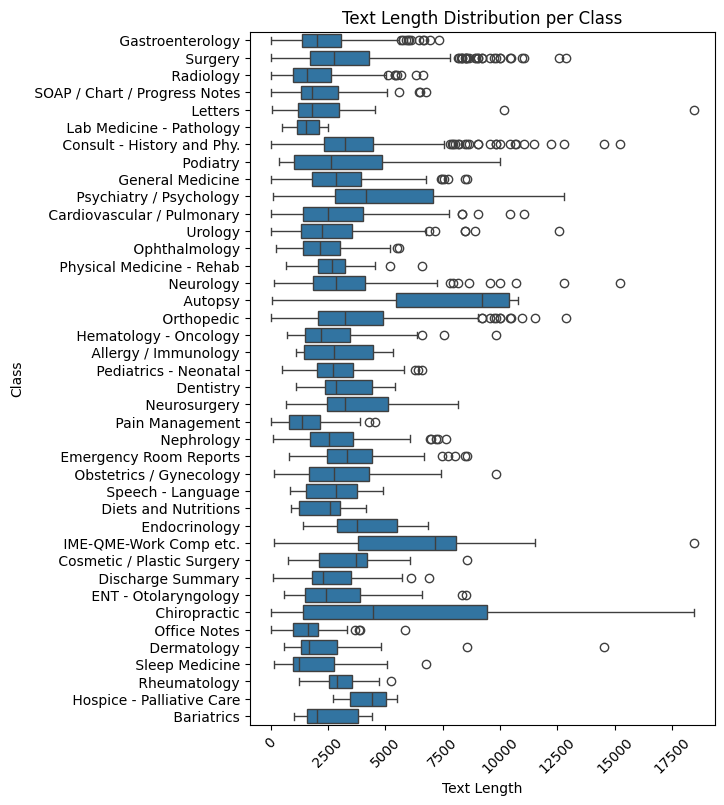

In [3]:
# Text lengths
lengths = df['text'].apply(len)
min_length = lengths.min()
avg_length = lengths.mean()
max_length = lengths.max()
print('Min length: ', min_length)
print('Avg length: ', avg_length.round(3))
print('Max length: ', max_length)

# Text lengths per class
lengths_per_class = df.groupby('label')['text'].apply(lambda x: x.str.len())
min_length_per_class = lengths_per_class.min()
avg_length_per_class = lengths_per_class.mean()
max_length_per_class = lengths_per_class.max()

# plot the text length distribution per class
fig, ax = plt.subplots(figsize=(6, 9))
sns.boxplot(y='label', x='text_length', data=df, ax=ax)
ax.set_title('Text Length Distribution per Class')
ax.set_ylabel('Class')
ax.set_xlabel('Text Length')
plt.xticks(rotation=45)
plt.show()


### Key Observations Min/avg/max text length and text lengths per class:

- There is a large variability across classes:  Some classes tend to have longer texts, such as "Gastroenterology" and "ENT," while others, like "Cardiovascular," have a more compact representation.

- Outliers: Several classes have outliers, evident from the individual data points situated above the upper whisker of the boxplots. Notably, classes like "Psychiatry" and "Emergency Medicine" have multiple outliers, suggesting a few instances where the text lengths substantially deviate from the typical lengths for those classes.

- Consistency in some classes: Some have a tight distribution, suggesting a consistency in the text lengths. For instance, the "Physical Medicine" and "Urology" categories have boxplots with shorter heights, indicating that their text lengths don't vary significantly.

- Classes with extensive lengths: "ENT" stands out with a particularly high median, and its interquartile range also leans towards the higher side. This suggests that texts under this class tend to be lengthier compared to others.

- Classes with short texts: On the opposite end, classes like "Consult," "Pediatric Surgery," and "Special & Advanced Cosmetic Surgery" tend to have shorter texts on average, as indicated by their lower median values.

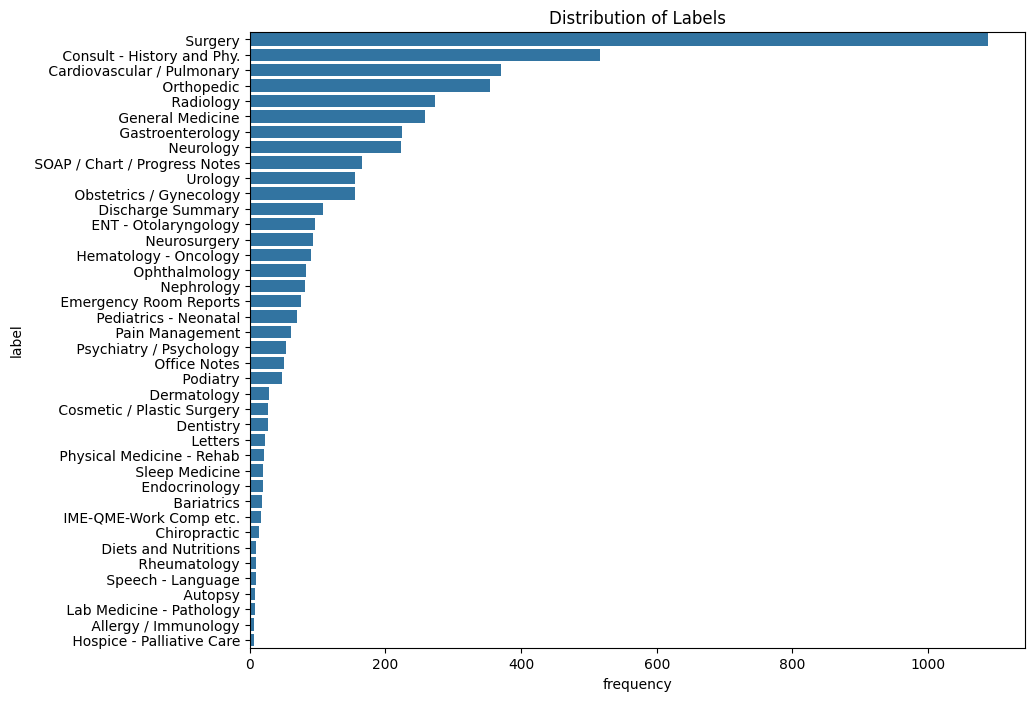

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# plot the label distribution
label_frequencies = df.label.value_counts()

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(
	x=label_frequencies.values,
	y=label_frequencies.index,
	ax=ax
)
ax.set_title('Distribution of Labels')
ax.set_xlabel('frequency')
ax.set_ylabel('label')
plt.show()

This shows how unbalanced the dataset is 

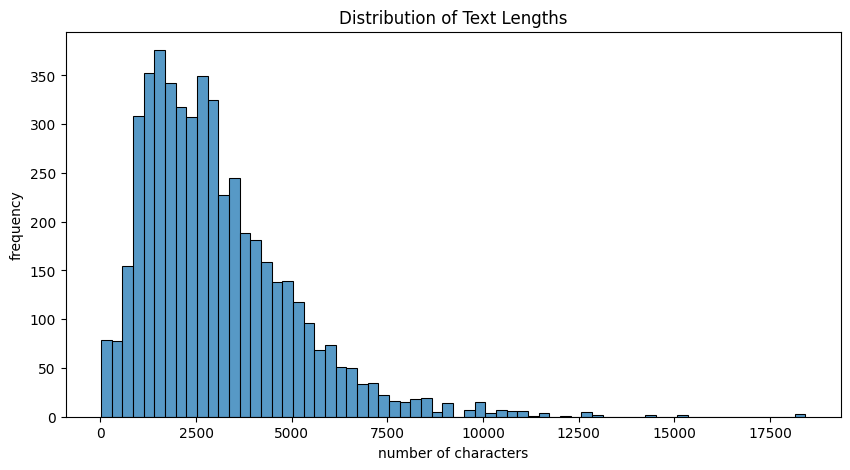

In [5]:
# plot the distribution of text lengths
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(
	df.text_length,
	ax=ax
)
ax.set_title('Distribution of Text Lengths')
ax.set_xlabel('number of characters')
ax.set_ylabel('frequency')
plt.show()

C:\Users\Reby\AppData\Local\Temp\ipykernel_22784\3443563669.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)


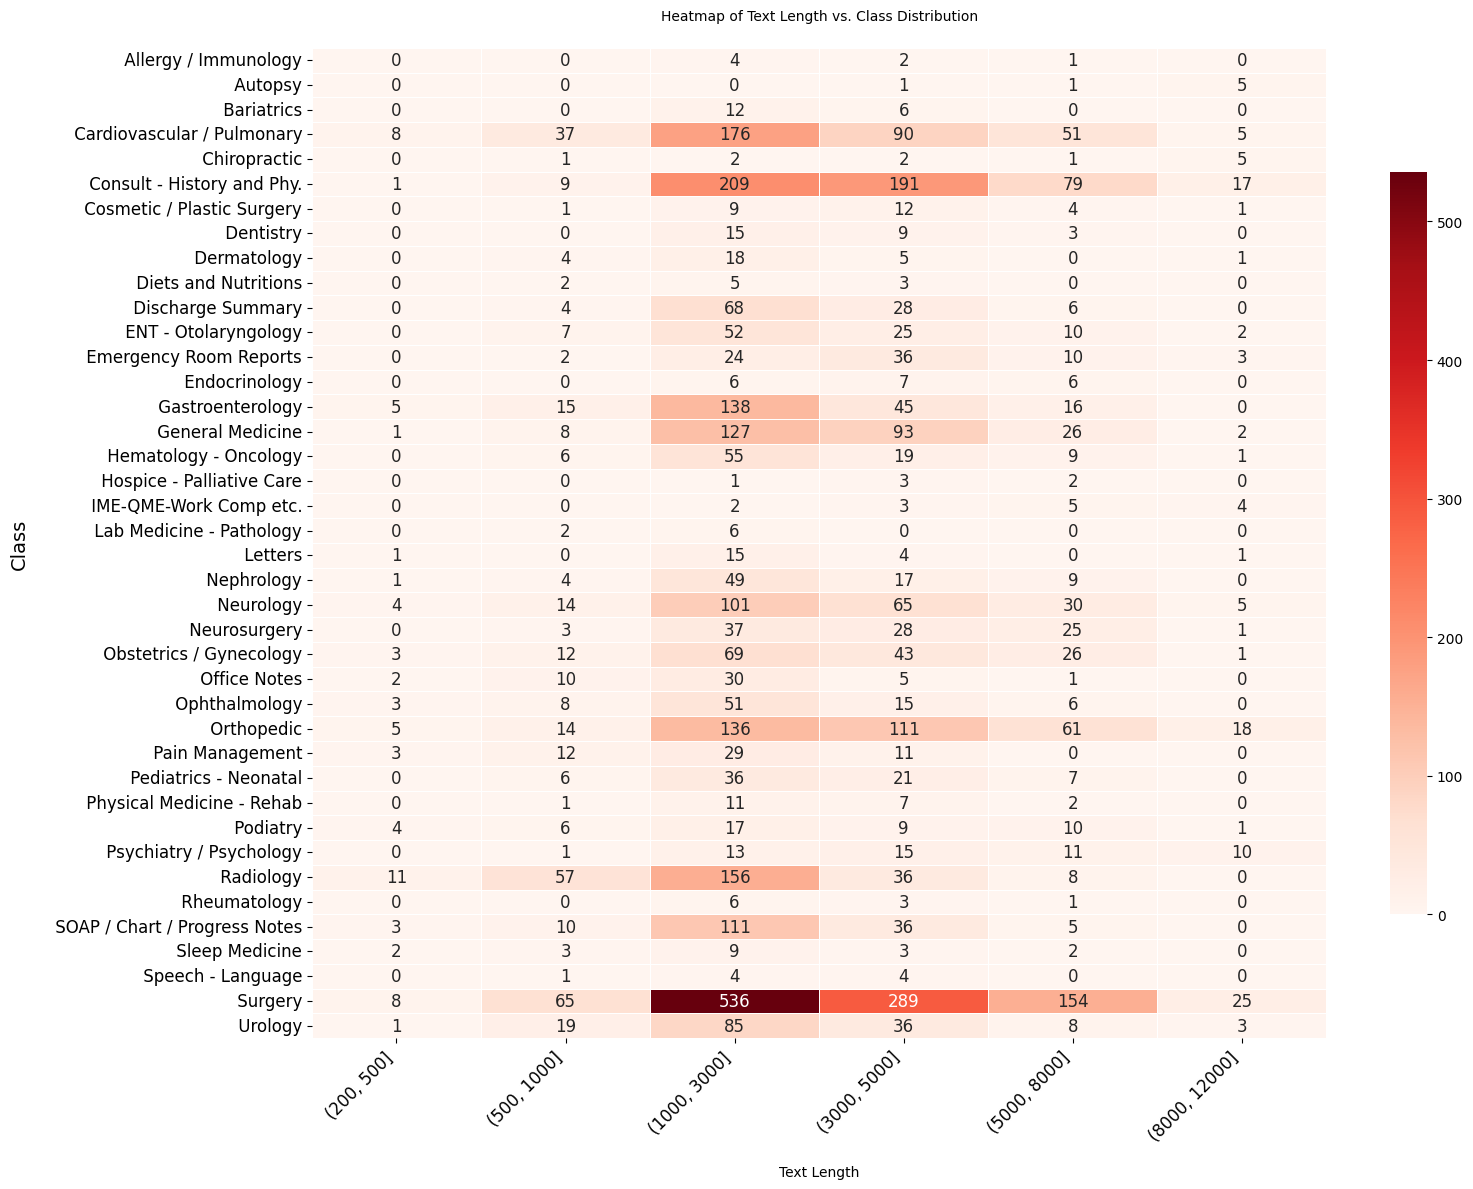

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['text_length'] = df['text'].apply(len)

bins = [200, 500, 1000, 3000, 5000, 8000, 12000] 
df['text_length_bin'] = pd.cut(df['text_length'], bins=bins, labels=['(200, 500]', '(500, 1000]', '(1000, 3000]', '(3000, 5000]', '(5000, 8000]', '(8000, 12000]'])

pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)

plt.figure(figsize=(16, 12))

cmap = sns.color_palette("Reds", as_cmap=True)

sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt=".0f",
            linewidths=.5, cbar_kws={"shrink": 0.75}, 
            annot_kws={"size": 12})

plt.title('Heatmap of Text Length vs. Class Distribution', fontsize=10, pad=20)
plt.xlabel('Text Length', fontsize=10, labelpad=15)
plt.ylabel('Class', fontsize=14, labelpad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


Most texts are in the range 1000-3000

### determining the national language(s) used

In [7]:
# !pip install langdetect
from langdetect import detect

df['language'] = df['text'].apply(lambda x: detect(x))
unique_languages = df['language'].unique()

# create a dictionary text samples : language
language_counts = {}
for lang in unique_languages:
    count = len(df[df['language'] == lang])
    language_counts[lang] = count
print(language_counts)


{'en': 4953, 'so': 2, 'pt': 3, 'de': 2, 'nl': 2, 'tl': 2, 'ro': 2}


The majority of samples are english texts 

### Reading through 100+ samples

In [8]:
#samples = df.sample(100)['text']
samples = df.sample(1)['text']
for sample in samples:
    print(sample)

CC:, HA and vision loss.,HX: ,71 y/o RHM developed a cataclysmic headache on 11/5/92 associated with a violent sneeze. The headache lasted 3-4 days. On 11/7/92, he had acute pain and loss of vision in the left eye. Over the following day his left pupil enlarged and his left upper eyelid began to droop. He was seen locally and a brain CT showed no sign of bleeding, but a tortuous left middle cerebral artery was visualized. The patient was transferred to UIHC 11/12/92.,FHX:, HTN, stroke, coronary artery disease, melanoma.,SHX:, Quit smoking 15 years ago.,MEDS:, Lanoxin, Capoten, Lasix, KCL, ASA, Voltaren, Alupent MDI,PMH: ,CHF, Atrial Fibrillation, Obesity, Anemia, Duodenal Ulcer, Spinal AVM resection 1986 with residual T9 sensory level, hyperreflexia and bilateral babinski signs, COPD.,EXAM: ,35.5C, BP 140/91, P86, RR20. Alert and oriented to person, place, and time. CN: No light perception OS, Pupils: 3/7 decreasing to 2/7 on exposure to light (i.e., fixed/dilated pupil OS). Upon neutr

-  Style and Structure:
    * Clinical and detailed: The texts follow a typical clinical documentation format, detailing both subjective complaints and objective findings. They delineate the assessment and subsequent plans, maintaining clarity and specificity. Example: "She feels as though she may have some allergies at night. Most of her symptoms occur then, not during the day." describes a patient's symptoms in a straightforward, clinical manner. 

    * Segmented: Each narrative is divided into various segments, which can range from 'Objective' to 'Impression.' Each segment has its own set of specifics, aiding in clarity and organization.
Example: Under the heading "REVIEW OF SYSTEMS:", various body systems are listed with associated findings or symptoms.

-  Vocabulary:
     * Medical Terminology: such as "rhinorrhea," "thyromegaly," "otoscopy," "Rinne test," and "arthroplasty." but also clinical descriptions with sentences like "well-developed, well-nourished," and "in no distress" are standard clinical descriptors.

- Spelling:
    * Most terms are correctly spelled, but a careful proofreading can ensure the absence of typos. For instance, "mammogram which was normal recently" may benefit from a more grammatically sound structure.

- Noteworthy Characteristics:

    * Acronyms: The text often resorts to acronyms like "HEENT," "GI," and "GU" to denote various systems of the body - common in medical narratives to provide concise information.

    * Punctuation: The use of commas and periods is consistent, especially to list symptoms or clinical findings.

    * Measurements: The text uses exact measurements where necessary, like "2 cm in length" or "24 mg dose bid."

    * Clinical tests and examinations: frequently includes specific clinical tests (e.g., "DIX-HALLPIKE" or "FRENZEL GLASSES EXAMINATION") and their outcomes for a comprehensive overview of the patient's health.

    * Recommendations and follow-ups: Each narrative concludes with specific recommendations or plans for the patient, based on the assessments made.



Some sentences can be revised for better coherence and grammar. For instance, "She had a mammogram which was normal recently" could be changed to "She recently had a mammogram, which was normal." Uniformity in patient descriptions would also be needed, some descriptions provide the ethnicity and gender of the patient ("77-year-old Hispanic male"), others do not. Ensuring uniformity across narratives can help in consistent data representation.

In [9]:
# find headers in a given text
import re
from nltk.tokenize import sent_tokenize

def find_headers(text):
    """Find headers in a given text"""
    potential_headers = re.findall(r'([A-Z\s]+:)', text)
    # in uppercase and end with colon
    return [header for header in potential_headers if header.isupper()]



df['headers'] = df['text'].apply(find_headers)

unique_headers_set = set()
df['headers'].apply(unique_headers_set.update)
unique_headers_list = list(unique_headers_set)

print(unique_headers_list)


['MICROSCOPIC EXAMINATION:', 'ALLERGIES:', 'REASON FOR TRANSFER:', 'WOMAC SCORE:', '  RECTAL:', 'INDICATIONS AND CONCERNS:', 'CORONARY ANATOMY:', 'REMAINING UNANSWERED QUESTIONS:', 'FAMILY AND SOCIAL HISTORY:', 'SAPHENOUS VEIN GRAFT TO RIGHT CORONARY ARTERY:', 'GYN:', 'DISCHARGE INSTRUCTIONS AND MEDICATIONS:', 'TESTS ORDERED:', 'INTERPRETATION OF IMAGES:', 'PREOP DX:', 'OPERATING MICROSCOPE:', ' BRUSHINGS:', 'POSTOP DX:', 'SPONGE AND NEEDLE COUNTS:', 'COUNTS:', 'BLOOD REPLACED:', 'THIRD ANESTHESIA:', 'LM:', 'BLOOD TRANSFUSIONS:', 'MEMORY:', '  PR:', 'SELECTIVE CORONARY ARTERIOGRAPHY:', 'NONCORONARY CARDIAC STRUCTURE:', 'HOSPITAL COURSE PER PROBLEM LIST:', 'HEAD SHAKING:', 'SURGICAL INDICATIONS:', 'HALLPIKE:', 'CLINICAL NOTE:', 'SKIN PREP:', 'TYPE OF ANESTHESIA:', 'INTERNAL CAROTID ARTERY INJECTIONS:', 'FUNCTIONAL MOBILITY:', 'PRIMARY DIAGNOSES:', 'MEDICATION:', 'S DESCRIPTION OF RELATIONSHIP WITH RECIPIENT:', 'STAGE:', 'PAST LABORATORY EVALUATION:', 'ERCP:', 'EDUCATIONAL MATERIAL PROVI

In [10]:
df.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length text_length_bin language  \
0                Gastroenterology         1085    (1000, 3000]       en   
1                         Surgery         1798    (1000, 3000]       en   
2                       Radiology         1141    (1000, 3000]       en   
3                         Surgery         1767    (1000, 3000]       en   
4   SOAP / Chart / Progress Notes         1519    (1000, 3000]       en   

                                             headers  
0  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
1  [CLINICAL INDICATION:, PROCEDURES PERFORMED:, ...  
2                                        [FINDINGS:]  
3  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
4  [REASON FOR VISIT:, HISTORY:, IMPRESSION:, PLAN:]

In [11]:

header_counts_per_class = pd.DataFrame()

for label in df['label'].unique():
    subset = df[df['label'] == label]
    
    all_headers = [header for sublist in subset['headers'].tolist() for header in sublist]
    
 
    header_counts_per_class[label] = pd.Series(all_headers).value_counts()

header_counts_per_class = header_counts_per_class.fillna(0).T


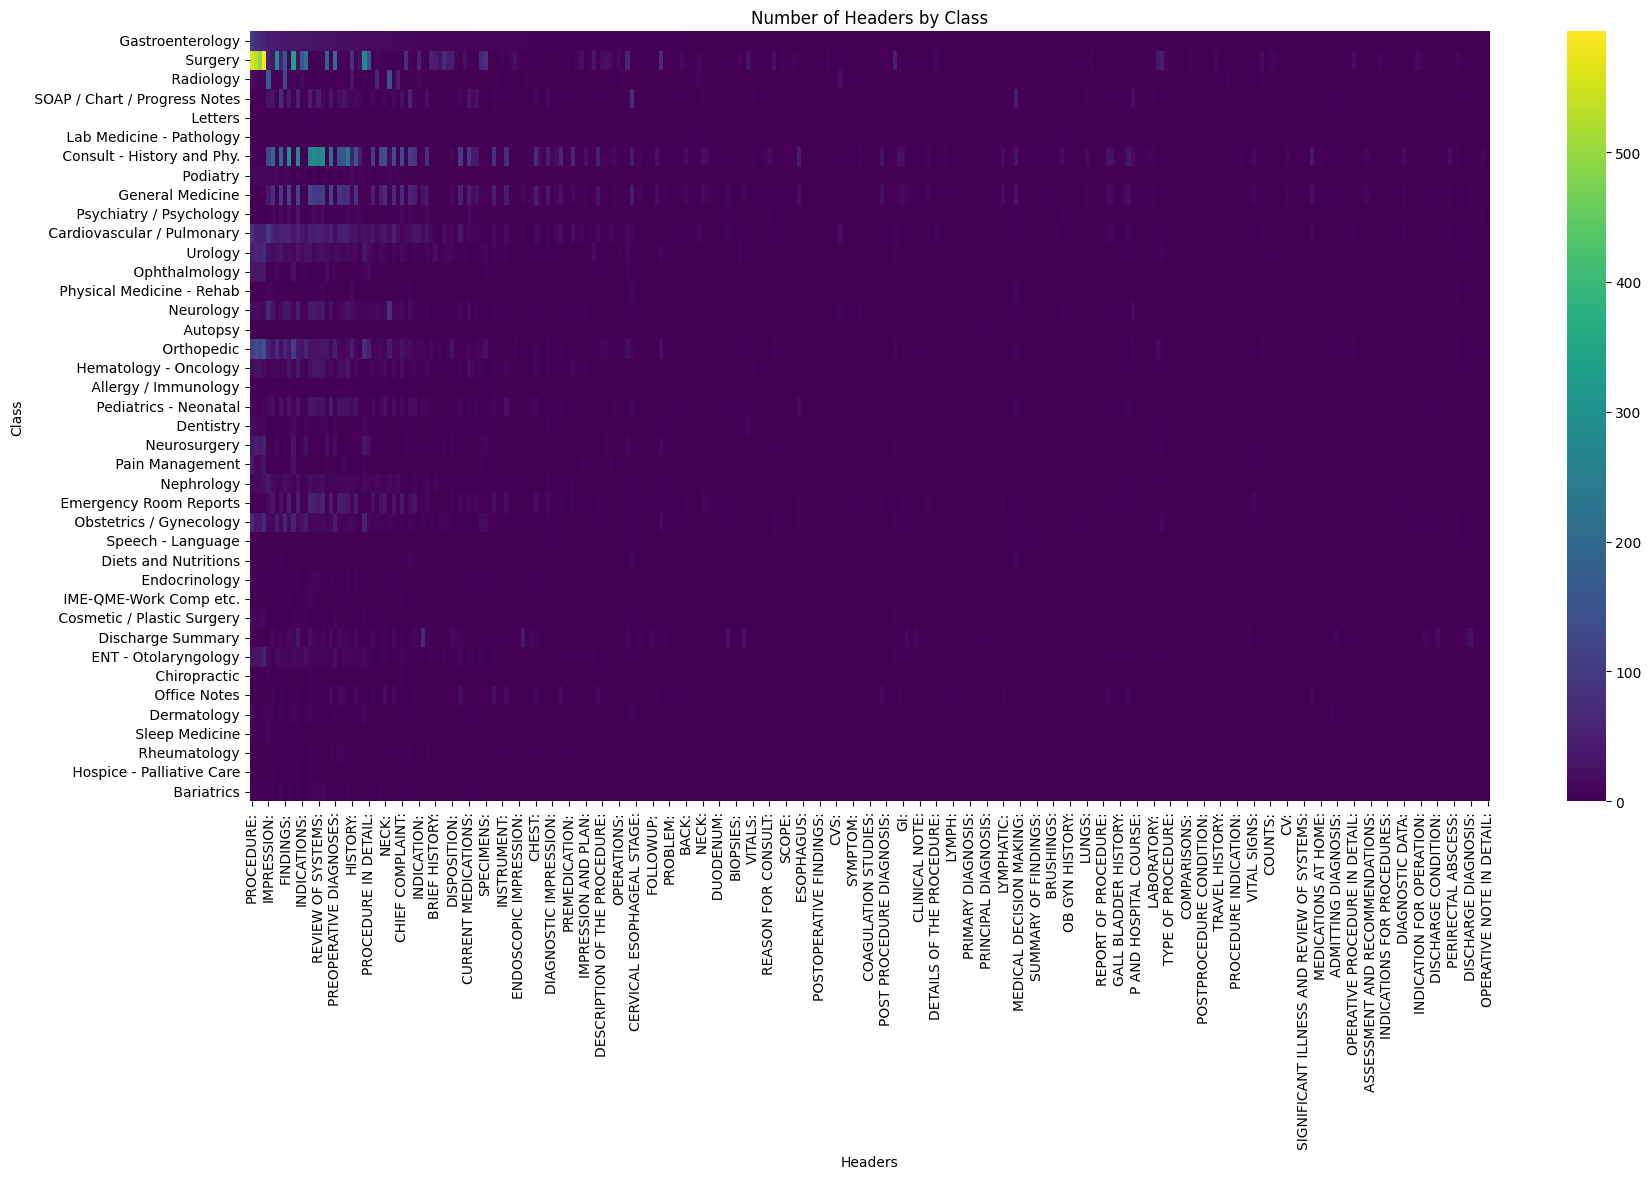

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(header_counts_per_class, cmap='viridis', annot=False, fmt='.0f')

plt.title("Number of Headers by Class")

plt.xticks(rotation=90)
plt.xlabel("Headers")
plt.ylabel("Class")
plt.show()

In [13]:
df.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length text_length_bin language  \
0                Gastroenterology         1085    (1000, 3000]       en   
1                         Surgery         1798    (1000, 3000]       en   
2                       Radiology         1141    (1000, 3000]       en   
3                         Surgery         1767    (1000, 3000]       en   
4   SOAP / Chart / Progress Notes         1519    (1000, 3000]       en   

                                             headers  
0  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
1  [CLINICAL INDICATION:, PROCEDURES PERFORMED:, ...  
2                                        [FINDINGS:]  
3  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
4  [REASON FOR VISIT:, HISTORY:, IMPRESSION:, PLAN:]

In [14]:
import pandas as pd

average_lengths = df.groupby('label')['text_length'].mean()

# standardize text length
df['standardized_text_length'] = df.apply(lambda row: row['text_length'] / average_lengths[row['label']], axis=1)


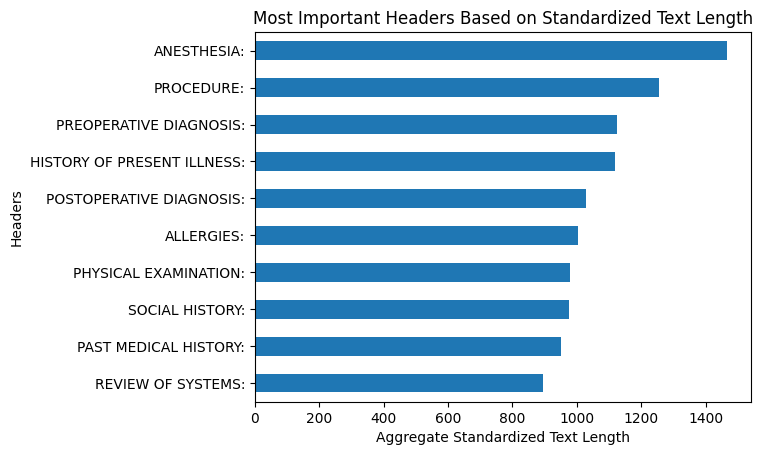

In [15]:
df = df.explode('headers')

# group by headers - sum standardized text lengths
agg_lengths = df.groupby('headers')['standardized_text_length'].sum().sort_values(ascending=False)

# top 10 headers
agg_lengths.head(10).plot(kind='barh')
plt.title('Most Important Headers Based on Standardized Text Length')
plt.xlabel('Aggregate Standardized Text Length')
plt.ylabel('Headers')
plt.gca().invert_yaxis()  # To have the most important header on top
plt.show()

Header Counts:
headers
ANESTHESIA:                    1284
PROCEDURE:                     1260
PREOPERATIVE DIAGNOSIS:        1134
POSTOPERATIVE DIAGNOSIS:       1051
HISTORY OF PRESENT ILLNESS:     954
                               ... 
UTERUS:                           1
ACCESSORY SPLEEN:                 1
COLON:                            1
URINARY BLADDER:                  1
POSTPROCEDURE EVALUATION:         1
Name: count, Length: 1891, dtype: int64

Header Classes:
headers
  ABDOMEN:         Obstetrics / Gynecology,  General Medicine,  ...
  AWAKE:                                 Sleep Medicine,  Neurology
  AXILLA:          Hematology - Oncology,  SOAP / Chart / Progre...
  AXIS I:          Psychiatry / Psychology,  Consult - History a...
  AXIS II:         Psychiatry / Psychology,  Consult - History a...
                                        ...                        
WORKUP:            Consult - History and Phy.,  Gastroenterology...
WOUND CLOSURE:                          

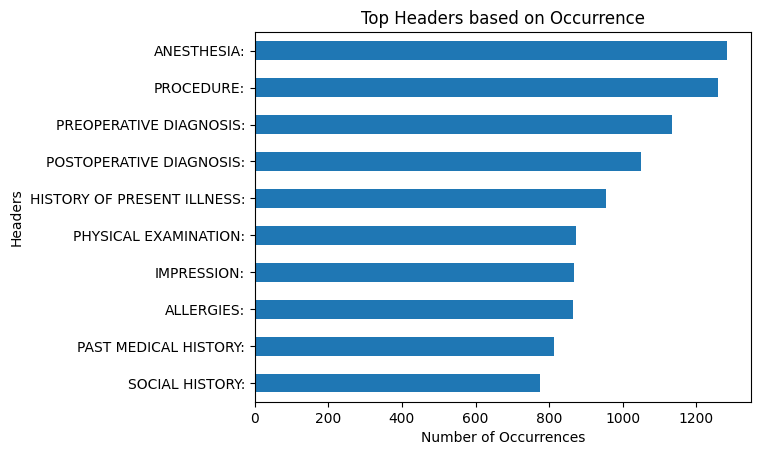

In [16]:

header_counts = df.explode('headers')['headers'].value_counts()
header_classes = df.explode('headers').groupby('headers')['label'].unique().apply(lambda x: ', '.join(x))

# co-occurrences
from itertools import combinations
co_occurrences = {}

for headers_list in df['headers']:
    if not isinstance(headers_list, list): 
        continue  
    for combo in combinations(headers_list, 2): # all possible combinations of 2 headers
        combo = tuple(sorted(combo))
        co_occurrences[combo] = co_occurrences.get(combo, 0) + 1
#
print("Header Counts:")
print(header_counts)
print("\nHeader Classes:")
print(header_classes)
print("\nCo-occurrences:")
sorted_co_occurrences = sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)
for pair, count in sorted_co_occurrences:
    print(pair, count)

#  top headers -  occurrences
top_headers = header_counts.head(10)
top_headers.plot(kind='barh')
plt.title('Top Headers based on Occurrence')
plt.xlabel('Number of Occurrences')
plt.ylabel('Headers')
plt.gca().invert_yaxis()
plt.show()


In [17]:
# df of top headers
df_top_headers = df[df['headers'].isin(top_headers.index)]
df_top_headers.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   

                                       prediction prediction_agent annotation  \
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
3           [{'label': ' Surgery', 'score': 1.0}]          Argilla       None   

  annotation_agent  multi_label explanation  \
0             None        False        None   
0             None        False        None   
0             None        False        None   
0             None        False        None   
3             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   

             event_timestamp                metrics              label  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}            Surgery   

   text_length text_length_bin language                   headers  \
0         1085    (1000, 3000]       en   PREOPERATIVE DIAGNOSIS:   
0         1085    (1000, 3000]       en  POSTOPERATIVE DIAGNOSIS:   
0         1085    (1000, 3000]       en                PROCEDURE:   
0         1085    (1000, 3000]       en                PROCEDURE:   
3         1767    (1000, 3000]       en   PREOPERATIVE DIAGNOSIS:   

   standardized_text_length  
0                  0.453877  
0                  0.453877  
0                  0.453877  
0                  0.453877  
3                  0.556787

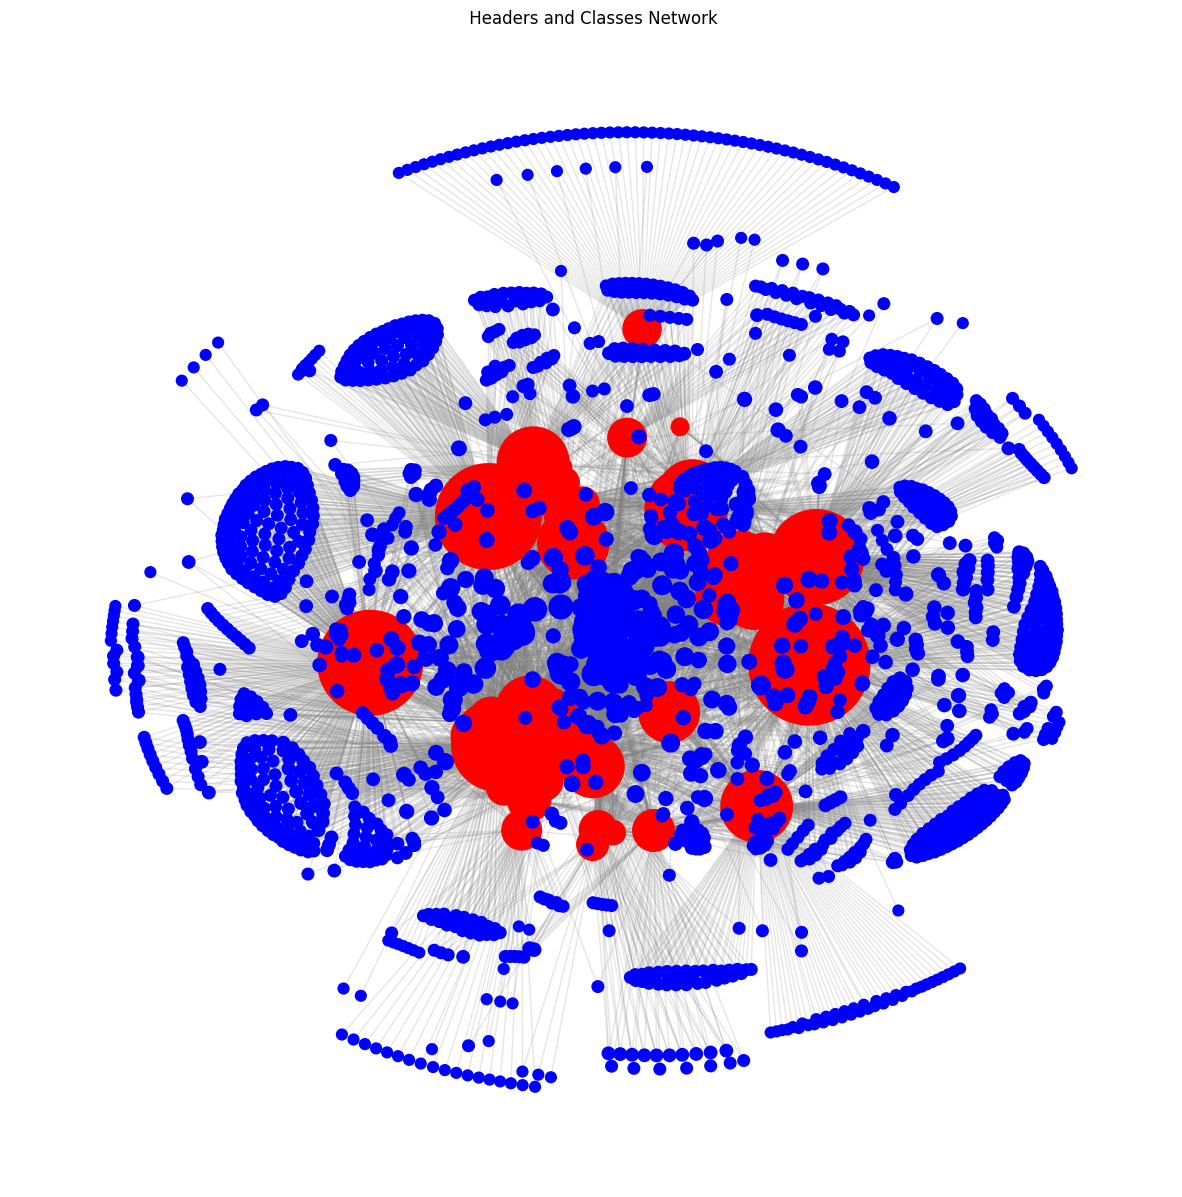

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        G.add_node(header, type='header', color='blue')
        G.add_node(med_class, type='class', color='red')
        G.add_edge(header, med_class)


degrees = dict(G.degree())
colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [50 + 10 * degrees[node] for node in G.nodes()]  
label_sizes = {node: (5 if degrees[node] < 3 else 10) for node in G.nodes()}  

plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G, weight=None)  
# don't show name of blue nodes (headers)
# nx.draw_networkx_labels(G, pos, font_size=label_sizes, alpha=0.0)

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=8, alpha=0.0 )

plt.title(' Headers and Classes Network')
plt.axis('off')
plt.show()


In [33]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, LabelSet, ColumnDataSource, HoverTool
from bokeh.palettes import Spectral4
import networkx as nx

# Ensure your Jupyter notebook can display Bokeh plots
output_notebook()

G = nx.Graph()

# Assuming `header_classes` is a dictionary that you have already defined
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        G.add_node(header, type='header')
        G.add_node(med_class, type='class')
        G.add_edge(header, med_class)

# Calculate the positions for the nodes
positions = nx.spring_layout(G)
nx.set_node_attributes(G, positions, 'position')

# Bokeh graph renderer using the networkx graph
graph_renderer = GraphRenderer()

graph_renderer.node_renderer.data_source.add(list(G.nodes()), 'index')
graph_renderer.node_renderer.data_source.add(Spectral4, 'color')
graph_renderer.edge_renderer.data_source.data = dict(
    start=[edge[0] for edge in G.edges()],
    end=[edge[1] for edge in G.edges()]
)

# Set the position layout
graph_layout = dict(G.nodes(data='position'))
graph_renderer.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

# Set up the figure
plot = figure(title='Headers and Classes Network', x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools='', toolbar_location=None)

# Add node hover tool
node_hover_tool = HoverTool(tooltips=[("index", "@index")])
plot.add_tools(node_hover_tool)

# Draw the network
plot.renderers.append(graph_renderer)

# Optionally, if you want to add labels to the nodes
source = ColumnDataSource({'x': [pos[0] for pos in positions.values()],
                           'y': [pos[1] for pos in positions.values()],
                           'name': [node for node in G.nodes()]})

labels = LabelSet(x='x', y='y', text='name', source=source, level='glyph',
                  x_offset=5, y_offset=5, render_mode='canvas', text_font_size="8pt")

plot.add_layout(labels)

# Show the plot
show(plot)


Loading BokehJS ...

ValueError: failed to validate StaticLayoutProvider(id='p1018', ...).graph_layout: expected a dict of type Dict(Int, Seq(Any)), got a dict with invalid keys:   ABDOMEN:,  Obstetrics / Gynecology,  General Medicine,  Consult - History and Phy.,  Hematology - Oncology,  Discharge Summary,  Cardiovascular / Pulmonary,  SOAP / Chart / Progress Notes,  Letters,  Emergency Room Reports,  Office Notes,  Urology,  Nephrology,  Orthopedic,  Dermatology,  Neurology,  Psychiatry / Psychology,  Pediatrics - Neonatal,  Endocrinology,   AWAKE:,  Sleep Medicine,   AXILLA:,   AXIS I:,   AXIS II:,   AXIS III:,   AXIS IV:,   BACK:,   BIMANUAL:,   BMI:,  Diets and Nutritions,   BMP:,   BP:,   BREASTS:,   CARDIAC:,   CARDIOPULMONARY:,   CARDIOVASCULAR:,  Dentistry,  Rheumatology,   CBC:,   CHEST:,   CLINICAL EVENTS:,   CNS:,   CONSTITUTIONAL:,   CVS:,   DEVELOPMENT:,   DUODENUM:,  Gastroenterology,  Surgery,   EKG:,   ENDOCRINE:,   ENT:,   ESOPHAGUS:,   EXTREMITIES:,   EYES:,   FBS:,   GASTROINTESTINAL:,   GENERAL APPEARANCE:,   GENERAL:,   GENITOURINARY:,   GI:,   GU:,   HDL:,   HEAD AND NECK:,   HEART:,   HEENT:,  Chiropractic,  Bariatrics,  ENT - Otolaryngology,   HEIGHT:,  Physical Medicine - Rehab,   HEM:,   HEMATOLOGIC AND LYMPHATIC:,   HR:,   LDL:,   LEFT ANTERIOR DESCENDING ARTERY:,  Radiology,   LEFT CIRCUMFLEX:,   LEFT MAIN:,   LENGTH OF THE TIME MARRIED:,   LENGTH OF TIME MARRIED:,   LMP:,   LUNG:,   LUNGS:,   LV:,   LYMPHATICS:,   MOTOR:,   MOUTH:,   MUSCULOSKELATAL:,   MUSCULOSKELETAL:,   NECK:,   NEURO:,   NEUROLOGIC EXAM:,   NEUROLOGIC:,   NEUROLOGICAL:,   OD:,  Ophthalmology,   ORTHO:,   P:,   PELVIC:,   PENIS:,   PHYSICIAN:,   PR:,   PROCEDURE:,   PSYCHIATRIC:,   PULMONARY:,   PULSE:,   RAS:,   RECTAL:,   RESPIRATIONS:,   RESPIRATORY:,   RIGHT BRACHIAL ARTERIAL LINE:,   RIGHT CORONARY ARTERY:,   RIGHT INTERNAL CAROTID ARTERY INJECTION:,   RIGHT SUBCLAVIAN TRIPLE LUMEN CATHETER:,   RR:,   SKIN:,   SLEEP:,   STOMACH:,   T:,   THORAX:,   VITAL SIGNS:,   VITALS SIGNS:,   VITALS:,   VLDL:,   WEIGHT:,   WT:,  ABDOMEN:,  ABG:,  AGE:,  AND ALLERGY HISTORY:,  AND NAILS:,  AND PAST MEDICAL HISTORY:,  AND THROAT:,  ANGIOGRAPHY:,  B:,  Autopsy,  BP:,  BRUSHINGS:,  CALCULATIONS:,  CAPSULE:,  CARDIAC:,  CARDIOVASCULAR:,  CATHETERS:,  CD:,  CN:,  CODE:,  COMPARISON:,  CONSTITUTIONAL:,  COORD:,  CSF:,  CV:,  CX:,  CXR:,  DDDR:,  DIAGNOSIS:,  DRESSING:,  Pain Management,  DRUG USE:,  EDD:,  EKG:,  EXAM:,  EXAMINEE :,  IME-QME-Work Comp etc.,  EXTREMITIES:,  FACE:,  FAMILY AND SOCIAL HISTORY:,  FINAL DIAGNOSES:,  FLEXOR CARPI ULNARIS:,  GAIT:,  GASTROSTOMY:,  GEN EXAM:,  GENERAL:,  GENITOURINARY:,  GW:,  HEENT:,  HOSPITALIZATIONS:,  HR:,  Podiatry,  I:,  II:,  III:,  IMPRESSIONS:,  INDICATIONS:,  IV:,  LAB FINDINGS:,  LAB ORDERS:,  LAD:,  LE:,  LEFT KIDNEY MASS:,  LM:,  LMP:,  LOWER LOBES:,  LUMBAR SPINE:,  LUNGS:,  LYMPH:,  LYMPHATICS:,  MEDIASTINUM AND CHEST WALL:,  MEDICATIONS:,  MMSE:,  MOTOR:,  MOUTH AND THROAT:,  NECK:,  NEEDLE COUNTS:,  NOSE AND THROAT:,  OD:,  OS:,  OU:,  OXIMETRY:,  P:,  PAST MEDICAL HISTORY AND SURGICAL HISTORY:,  PAST MEDICAL HISTORY:,  PERSONAL HISTORY:,  PLAN:,  PREMEDICATIONS:,  PRESSURES:,  PROCEDURE:,  PROCEDURES:,  QP:,  RCA:,  REASON FOR THE VISIT:,  REASON FOR VISIT:,  RECOMMENDATIONS:,  RECTAL:,  REFLEXES:,  REM:,  RESP:,  RESULTS:,  REVIEW OF SYSTEMS:,  RIGHT ARYEPIGLOTTIC FOLD:,  SCREW IN LEAD:,  SENSORY:,  SKIN:,  SOCIAL HISTORY:,  STATION:,  T:,  TESTS:,  UIHC:,  UNSPECIFIED ANGINA PECTORIS HISTORY:,  V:,  VI:,  VITAL SIGNS:,  VITALS:,  WEEKS:,  WOMAC SCORE:,  WORKERS COMP:,  X:,  XYZ:,  Y:, A:, ABD:, ABDOMEN:,  Allergy / Immunology, ABDOMINAL AORTOGRAM:, ABDOMINAL CT SCAN:, ABDOMINAL:, ABNORMAL FINDINGS:, ABNORMAL PAP HISTORY:, ABUSE HISTORY:, AC:, ACADEMIC BACKGROUND:, ACCESS METHOD:, ACCESS SITE:, ACCESS:, ACCESSORY SPLEEN:, ACNE CAN BE BROUGHT ON OR MADE WORSE BY:, ACROMION:, ACTIVATION PROCEDURES:, ACTIVE RANGE OF MOTION OF LUMBAR SPINE:, ACTIVE RANGE OF MOTION:, ACTIVITY AND LIMITATIONS:, ACTIVITY OF DAILY LIVING:, ACTIVITY ON DISCHARGE:, ACTIVITY:, ACUTE HIV SEROCONVERSION:, ADDENDUM:, ADDITIONAL DETAILS:, ADDITIONAL DISCHARGE DIAGNOSES:, ADDITIONAL GOALS:,  Speech - Language, ADDITIONAL INSTRUCTIONS:, ADDITIONAL LABORATORY STUDIES:, ADMISSION DIAGNOSES:, ADMISSION DIAGNOSIS:, ADMISSION LABS:, ADMISSION PHYSICAL EXAMINATION:, ADMISSION PHYSICAL:, ADMISSION SUMMARY:, ADMIT EXAM:, ADMITTING DIAGNOSES:, ADMITTING DIAGNOSIS:,  Neurosurgery, ADRENAL GLANDS:, ADRENALS:, ADULT MEDICAL PROBLEMS:, ADVANCED DIRECTIVE:, AFFECT:, AFTERCARE AND DISPOSITION:, AGE AND HEALTH OF SPOUSE:, ALLERGIC:, ALLERGIES TO MEDICATIONS:, ALLERGIES TO MEDICINES:, ALLERGIES:,  Hospice - Palliative Care,  Cosmetic / Plastic Surgery, ALLOWED CONDITION:, ALLOWED CONDITIONS:, ANALGESIA:, ANALYSIS OF ANGIOGRAMS:, ANALYSIS OF PRESSURE DATA:, ANATOMIC ANALYSIS:, ANATOMY:, ANCILLARY FINDINGS:, ANESTHESIA TIME:, ANESTHESIA TYPE:, ANESTHESIA:, ANESTHESIOLOGIST:, ANESTHESIOLOGY:, ANESTHETIC:, ANGIOGRAPHIC DATA:, ANGIOGRAPHIC DETAILS:, ANGIOGRAPHIC FINDINGS:, ANGIOPLASTY CONCLUSION:, ANGIOPLASTY:, ANSWER:, ANTERIOR TIBIALIS:, ANTICOAGULATION:, ANUS:, AORTA AND VENA CAVA:, AORTA ARCH ANGIOGRAM:, AORTA:, AORTIC ARCH ANGIOGRAM:, AORTIC VALVE:, AORTOGRAM:, APPEARANCE:, APPROACH:, ARTICULAR:, ASSESSMENT AND DISCHARGE PLAN:, ASSESSMENT AND EVALUATION:, ASSESSMENT AND PLAN:, ASSESSMENT AND RECOMMENDATIONS:, ASSESSMENT RESULTS:, ASSESSMENT:, ASSESSMENTS:, ASSETS:, ASSISTANT:, ASSOCIATED SIGNS AND SYMPTOMS FOR OTITIS MEDIA:, ATTENDING PHYSICIAN AT DISCHARGE:, ATTENDING PHYSICIAN:, ATTENTION AND CONCENTRATION:, ATTITUDE:, AXIS B:, AXIS C:, AXIS I:, AXIS II:, AXIS III:, AXIS IV:, AXIS V:, AXR:, BACK AND EXTREMITY:, BACK EXAM:, BACK:, BACKGROUND ACTIVITY:, BACKGROUND INFORMATION AND SURGICAL INDICATIONS:, BACKGROUND INFORMATION:, BALANCE:, BASELINE EKG:, BECK TESTING:, BEHAVIOR:, BEHAVIORAL OBSERVATIONS:, BIOMETRIC DATA:, BIOMETRY:, BIOPSIES:, BIRTH AND DEVELOPMENTAL HISTORY:, BIRTH HISTORY:, BIRTH HX:, BLOOD LOSS:, BLOOD PRODUCTS RECEIVED:, BLOOD REPLACED:, BLOOD STUDIES:, BLOOD TRANSFUSIONS:, BODY CAVITIES:, BONE:, BP:, BPD:, BRACHYTHERAPY:, BRADY PARAMETER SETTINGS ARE AS FOLLOWS:, BREAST CANCER HISTORY:, BREAST EXAM:, BREAST:, BREASTS:, BREATHING:, BRIEF CLINICAL NOTE:, BRIEF DESCRIPTION:, BRIEF HISTORY AND INDICATION FOR OPERATION:, BRIEF HISTORY AND INDICATION FOR PROCEDURE:, BRIEF HISTORY AND PHYSICAL:, BRIEF HISTORY OF HOSPITAL COURSE:, BRIEF HISTORY OF PRESENT ILLNESS:, BRIEF HISTORY OF THE PATIENT:, BRIEF HISTORY:, BRIEF HOSPITAL COURSE SUMMARY:, BRIEF HOSPITAL COURSE:, BRIEF NARRATIVE OF OPERATIVE PROCEDURE:, BRIEF SUMMARY OF HOSPITAL COURSE:, BUN:, CALCIUM SCORE:, CAPABILITY:, CARDIAC CHAMBERS:, CARDIAC RISKS:, CARDIAC VALVES:, CARDIAC:, CARDIOPULMONARY BYPASS TIME MONITOR:, CARDIOPULMONARY BYPASS TIME TOTAL:, CARDIOVASCULAR EXAM:, CARDIOVASCULAR SYSTEM:, CARDIOVASCULAR:, CASE DISCUSSION:, CATHETERIZED URINE:, CATHETERS USED:, CAUSATION AND APPORTIONMENT:, CAUSATION:, CAUSE OF DEATH:, CAUSES:, CAUTIONS ON TETRACYCLINE:, CBC:, CC:, CELL SAVER RETURNED:, CENTRAL NERVOUS SYSTEM:, CEREBROSPINAL FLUID BACTERIAL ANTIGENS:, CEREBROSPINAL FLUID CULTURE AND SENSITIVITY:, CERVICAL ESOPHAGEAL STAGE:, CERVICAL SPINE:, CHART NOTE:, CHART REVIEW:, CHEST CT SCAN:, CHEST:, CHIEF COMPLAINT AND IDENTIFICATION:, CHIEF COMPLAINT AND REACTION TO HOSPITALIZATION:, CHIEF COMPLAINT:, CHIEF COMPLAINTS:, CHIEF COMPLIANT:, CHIEF REASON FOR CONSULTATION:, CHILDHOOD HISTORY:, CHILDREN:, CIRCUMFLEX ARTERY:, CIRCUMFLEX CORONARY ARTERY:, CLAIM NUMBER :, CLAMP TIME:, CLINICAL ASSESSMENT AND FINDINGS:, CLINICAL DATA:, CLINICAL HISTORY:,  Lab Medicine - Pathology, CLINICAL IMPRESSION:, CLINICAL INDICATION:, CLINICAL INDICATIONS:, CLINICAL INFORMATION:, CLINICAL INTERPRETATION:, CLINICAL NOTE:, CLINICAL RESUME:, CLINICAL SUMMARY:, CLINICAL:, CLINOCOPATHOLIGICAL CORRELATION:, CLOSURE:, CLOTHING:, CN:, CNS:, COAGULATION STUDIES:, CODE STATUS:, COGNITIVE ASSESSMENT:, COLON:, COLONOSCOPY:, COMMENT:, COMMENTS:, COMMUNICATION SKILLS:, COMPARISON EXAM:, COMPARISON EXAMINATION:, COMPARISON STUDIES:, COMPARISON:, COMPARISONS:, COMPLEXITY:, COMPLIANCE:, COMPLICATION:, COMPLICATIONS:, COMPONENTS USED:, COMPONENTS:, COMPRESSION:, CONCLUSION:, CONCLUSIONS:, CONDITION AND TREATMENT:, CONDITION AT DISCHARGE:, CONDITION OF PATIENT ON DISCHARGE:, CONDITION OF THE PATIENT AFTER SURGERY:, CONDITION OF THE PATIENT AT DISCHARGE:, CONDITION OF THE PATIENT AT THE END OF THE PROCEDURE:, CONDITION ON DISCHARGE:, CONDITION ON DISPOSITION:, CONDITION ON TRANSFER:, CONDITION UPON DISCHARGE:, CONDITION UPON DISPOSITION:, CONDITION:, CONSENT FORM:, CONSENT:, CONSTITUTIONAL SYMPTOMS:, CONSTITUTIONAL:, CONSULT REQUEST FOR:, CONSULT:, CONSULTATION:, CONSULTATIONS:, CONSULTING SERVICES:, CONSULTS:, CONTESTED CONDITION:, CONTESTED CONDITIONS:, CONTRAST ADMINISTERED:, CONTRAST TYPE:, CONTRAST VOLUME:, CONTRAST:, COORD:, COORDINATION OF CARE:, COORDINATION:, COPING STRATEGIES:, COR:, CORD:, CORONARIES:, CORONARY ANATOMY:, CORONARY ANGIOGRAM:, CORONARY ANGIOGRAPHY:, CORONARY ARTERIES:, CORONARY CTA:, CORONARY RISK FACTORS:, CORONARY:, COUNSELING:, COUNT:, COUNTS:, COURSE IN HOSPITAL:, COURSE IN THE ED:, COURSE IN THE HOSPITAL:, COURSE ON ADMISSION:, COURSE:, CPAP TITRATION STUDY:, CPT CODE:, CRANIAL NERVES:, CRITICAL CARE NOTE:, CRYSTALLOID GIVEN:, CRYSTALLOIDS GIVEN:, CRYSTALLOIDS:, CT ABDOMEN:, CT PELVIS:, CULTURES TAKEN:, CULTURES:, CURRENT DIAGNOSES:, CURRENT FUNCTIONING:, CURRENT HISTORY OF PRESENT ILLNESS:, CURRENT HISTORY:, CURRENT HOME MEDICATIONS:, CURRENT INTERVENTION:, CURRENT MEDICATION:, CURRENT MEDICATIONS AT HOME:, CURRENT MEDICATIONS:, CURRENT MEDICINES:, CURRENT MEDS:, CURRENT OCCUPATION:, CURRENT SYMPTOMS:, CURRENT WORK STATUS:, CV:, CVS:, CX:, CXR:, DAILY ACTIVITIES AND FUNCTIONING:, DATA REVIEWED:, DATA:, DATABASE:, DATE OF ADMISSION:, DATE OF DISCHARGE:, DATE OF EXAMINATION :, DATE OF EXAMINATION:, DATE OF INJURY :, DATE OF PREVIOUS ULTRASOUND:, DELIVERY NOTE:, DENTAL:, DERM:, DERMATOLOGIC:, DESCRIPTION OF FINDINGS:, DESCRIPTION OF OPERATION:, DESCRIPTION OF OPERATIONS:, DESCRIPTION OF OPERATIVE PROCEDURE:, DESCRIPTION OF PROCEDURE IN DETAIL:, DESCRIPTION OF PROCEDURE:, DESCRIPTION OF RECORD:, DESCRIPTION OF SPECIMEN:, DESCRIPTION OF SURGERY:, DESCRIPTION OF TECHNIQUE:, DESCRIPTION OF THE CASE:, DESCRIPTION OF THE OPERATION:, DESCRIPTION OF THE PROCEDURE IN DETAIL:, DESCRIPTION OF THE PROCEDURE:, DESCRIPTION:, DETAIL OF THE OPERATION:, DETAILED OPERATIVE NOTE:, DETAILS OF PROCEDURE:, DETAILS OF THE OPERATION:, DETAILS OF THE OR:, DETAILS OF THE PROCEDURE:, DETAILS:, DETERMINATION:, DEVELOPMENT AGE FACTORS:, DEVELOPMENT HISTORY:, DEVELOPMENT:, DEVELOPMENTAL ASSESSMENT:, DEVELOPMENTAL BACKGROUND:, DEVELOPMENTAL HISTORY:, DEVELOPMENTAL MILESTONES:, DEVELOPMENTAL:, DEVICE IMPLANTED:, DEVICE SETTINGS:, DEVICES USED:, DEVICES:, DIABETES MEDICATIONS:, DIAGNOSES ON ADMISSION:, DIAGNOSES ON DISCHARGE:, DIAGNOSES PROBLEMS:, DIAGNOSES:, DIAGNOSIS AT ADMISSION:, DIAGNOSIS ON ADMISSION:, DIAGNOSIS:, DIAGNOSTIC AND LABORATORY DATA:, DIAGNOSTIC DATA:, DIAGNOSTIC IMAGERY:, DIAGNOSTIC IMAGING:, DIAGNOSTIC IMPRESSION:, DIAGNOSTIC OPINION:, DIAGNOSTIC STUDIES:, DIAGNOSTIC SUMMARY AND IMPRESSION:, DIAGNOSTIC TEST:, DIAGNOSTICS:, DIET ON DISCHARGE:, DIET:, DIETARY:, DIETICIAN:, DIFFERENTIAL DIAGNOSES:, DIFFERENTIAL DIAGNOSIS:, DIFFICULTY:, DIFFUSION CAPACITY:, DIGITAL RECTAL EXAMINATION:, DIMENSIONS:, DISALLOWED CONDITION:, DISCHARGE ACTIVITIES:, DISCHARGE CONDITION:, DISCHARGE DATE:, DISCHARGE DIAGNOSES:, DISCHARGE DIAGNOSIS:, DISCHARGE DIET:, DISCHARGE DISPOSITION:, DISCHARGE EXAM:, DISCHARGE FOLLOWUP PLANNING:, DISCHARGE FOLLOWUP:, DISCHARGE INSTRUCTIONS AND MEDICATIONS:, DISCHARGE INSTRUCTIONS:, DISCHARGE LABS:, DISCHARGE MEDICATIONS:, DISCHARGE NOTE:, DISCHARGE ORDERS:, DISCHARGE PHYSICAL EXAMINATION:, DISCHARGE PLAN:, DISCHARGE PRESCRIPTIONS:, DISCHARGE SUMMARY:, DISCHARGE WEIGHT:, DISCHARGE:, DISCIPLINE PROBLEMS:, DISCUSSION AND PLAN:, DISCUSSION:, DISPOSITION OF SPECIMENS:, DISPOSITION ON DISCHARGE:, DISPOSITION:, DOB:, DOPPLER:, DRAIN:, DRAINS AND SPECIMENS:, DRAINS AND TUBES:, DRAINS:, DRESSINGS:, DRUG ALLERGIES:, DRUG HISTORY:, DRUG INTOLERANCE:, DRUG SENSITIVITIES:, DSM IV DIAGNOSES:, DUODENUM:, DURATION OF SURGERY:, EAR:, EARS:, EATING HISTORY:, EBL:, ECHO:, ECHOCARDIOGRAPHIC DIAGNOSES:, ECLAMPSIA:, ECONOMIC HISTORY:, ED COURSE:, ED STUDIES:, EDD BY CURRENT ULTRASOUND:, EDD BY DATES:, EDD BY PREVIOUS ULTRASOUND:, EDUCATIONAL HISTORY:, EDUCATIONAL MATERIAL PROVIDED:, EDUCATIONAL:, EEG PARAMETERS:, EEG:, EKG PARAMETERS:, EKG:, ELECTROCARDIOGRAPHIC OBSERVATIONS:, ELECTROPHYSIOLOGIC MEASUREMENTS:, ELECTROPHYSIOLOGICAL FINDINGS:, ELEVATION:, ELIMINATION:, EMERGENCY DEPARTMENT COURSE:, EMERGENCY DEPARTMENT LABS:, EMERGENCY DEPARTMENT TESTING:, EMERGENCY ROOM COURSE:, EMG PARAMETERS:, EMOTIONAL REACTION TO DIAGNOSIS AND TREATMENT COURSE:, EMPLOYER:, ENDOCRINE SYSTEM:, ENDOCRINE:, ENDOSCOPE USED:, ENDOSCOPIC CARPAL TUNNEL RELEASE:, ENDOSCOPIC DIAGNOSIS:, ENDOSCOPIC FINDINGS:, ENDOSCOPIC IMPRESSION:, ENMT:, ENT:, EPIDUROGRAM:, EPIGLOTTIS:, EPS:, EQUIPMENT RECOMMENDATION:, EQUIPMENT:, ER COURSE:, ERCP:, ESOPHAGOGASTRODUODENOSCOPY:, ESOPHAGUS:, ESTIMATED BLOOD LOSS:, ESTIMATED CONTRAST:, ESTIMATED DATE OF DELIVERY:, ESTIMATED FETAL WEIGHT PERCENTILE:, ESTIMATED LENGTH OF STAY:, EVIDENCE COLLECTED:, EVIDENCE OF INJURY:, EVIDENCE OF RECENT MEDICAL TREATMENT:, EVIDENCE OF THERAPEUTIC INTERVENTION:, EXAM:, EXAMINATION:, EXAMINING PHYSICIAN :, EXAMINING PHYSICIANS :, EXERCISE RESULTS:, EXT:, EXTENSOR DIGITORUM:, EXTERNAL EVIDENCE OF INJURY:, EXTERNAL EXAMINATION:, EXTERNAL GENITALIA:, EXTREMITIES:, EYE EXAM:, EYES:, FACE LIFT:, FACE:, FACIAL BONES:, FACTORS FOR DISABILITY:, FALL RISK ASSESSMENT:, FALLOPIAN TUBES:, FAMILY AND SOCIAL HISTORY:, FAMILY AND SUPPORT SYSTEMS:, FAMILY BACKGROUND:, FAMILY HISTORY AND SOCIAL HISTORY:, FAMILY HISTORY:, FAMILY HX:, FAMILY MEDICAL HISTORY:, FAMILY PSYCHIATRIC HISTORY:, FAMILY SOCIAL HISTORY:, FATHER:, FEEDING AND NUTRITION:, FEEDING:, FEMALE GENITAL SYSTEM:, FEMALE REVIEW OF SYSTEMS:, FETAL ANATOMY:, FETAL BIOMETRY:, FETAL WEIGHT BY CURRENT ULTRASOUND:, FH:, FHX:, FILES REVIEW:, FINAL DIAGNOSES:, FINAL DIAGNOSIS:, FINAL IMPRESSION:, FINAL INTERPRETATION:, FINAL SPONGE AND NEEDLE COUNTS:, FINDING:, FINDINGS AND PROCEDURE:, FINDINGS AT OPERATION:, FINDINGS AT THE TIME OF SURGERY:, FINDINGS AT TIME OF SURGERY:, FINDINGS DURING THE PROCEDURE:, FINDINGS OF THE OPERATION:, FINDINGS:, FIRST ANESTHESIA:, FIRST ASSISTANT:, FIRST DORSAL INTEROSSEOUS:, FIRST SECOND ANESTHESIA:, FL:, FLUID RECEIVED:, FLUID REPLACEMENT:, FLUID:, FLUIDS GIVEN:, FLUIDS RECEIVED:, FLUIDS:, FLUORO TIME:, FLUOROSCOPY TIME:, FOLLOW UP INSTRUCTIONS:, FOLLOW UP:, FOLLOWUP APPOINTMENTS:, FOLLOWUP CARE:, FOLLOWUP:, FORMULATION:, FRENZEL GLASSES EXAMINATION:, FUNCTIONAL ACTIVITIES AND HOBBIES:, FUNCTIONAL ANALYSIS:, FUNCTIONAL CAPACITY:, FUNCTIONAL EXAMINATION:, FUNCTIONAL HISTORY:, FUNCTIONAL INQUIRY:, FUNCTIONAL MOBILITY:, FUNCTIONAL STATUS:, GAIT:, GALL BLADDER HISTORY:, GASTROINTESTINAL SYSTEM:, GASTROINTESTINAL:, GEN EXAM:, GEN:, GENERAL APPEARANCE:, GENERAL EVALUATION:, GENERAL OBSERVATIONS:, GENERAL PHYSICAL EXAMINATION:, GENERAL:, GENETIC PSYCHIATRIC HISTORY:, GENITAL:, GENITALIA:, GENITOURINARY SYSTEM:, GENITOURINARY:, GESTALT TEST:, GESTATIONAL AGE BY CURRENT ULTRASOUND:, GESTATIONAL AGE BY DATES:, GI:, GOALS:, GRAFTS PERFORMED:, GREAT VESSELS:, GROSS DESCRIPTION:, GROSS FINDINGS:, GROSS INTRAOPERATIVE FINDINGS:, GROSS NEUROLOGICAL EXAM:, GROSS OPERATIVE FINDINGS:, GU EXAM:, GU:, GUMS:, GYN HISTORY:, GYN:, GYNECOLOGIC HISTORY:, GYNECOLOGICAL HISTORY:, HABITS:, HAIR AND SKIN:, HALLPIKE:, HARDWARE SPECIFICATIONS:, HARDWARE USED:, HARDWARE:, HC:, HEAD AND NECK EXAMINATION:, HEAD AND NECK:, HEAD SHAKING:, HEAD:, HEADACHE HISTORY:, HEALTH HABITS:, HEART RATE AFTER MEDICATION:, HEART RATE:, HEART:, HEENT AND NECK:, HEENT:, HEMATOLOGIC AND LYMPHATIC:, HEMATOLOGIC:, HEMATOLOGICAL:, HEMATOLOGY AND IMMUNE:, HEMATOLOGY:, HEMATOPOIETIC:, HEMODYNAMIC DATA:, HEMODYNAMICS:, HEMOLYMPHATIC SYSTEM:, HEMOSTASIS:, HEPATOBILIARY SYSTEM:, HIGHEST LEVEL OF EDUCATION:, HIPS:, HISTORY AND CLINICAL DATA:, HISTORY AND GROSS FINDINGS:, HISTORY AND HOSPITAL COURSE:, HISTORY AND INDICATIONS:, HISTORY AND PHYSICAL:, HISTORY AND REASON FOR CONSULTATION:, HISTORY FINDINGS HOSPITAL COURSE:, HISTORY OF ILLNESS:, HISTORY OF INDUSTRIAL INJURY:, HISTORY OF INJURY AND PRESENT COMPLAINTS:, HISTORY OF OCCUPATIONAL INJURY OR ILLNESS:, HISTORY OF OTHER PERTINENT MEDICAL EVENTS:, HISTORY OF PRESENT COMPLAINT:, HISTORY OF PRESENT ILLNESS AND HOSPITAL COURSE:, HISTORY OF PRESENT ILLNESS:, HISTORY OF PRESENT INJURY:, HISTORY OF PRESENT PROBLEM:, HISTORY OF PRESENTING COMPLAINT:, HISTORY OF PRESENTING ILLNESS:, HISTORY OF PRESENTING PROBLEM:, HISTORY OF PROCEDURE:, HISTORY OF THE PRESENT ILLNESS:, HISTORY:, HOBBIES:, HOLTER MONITOR SUMMARY ANALYSIS:, HOME MEDICATIONS:, HOSPITAL COURSE AND TREATMENT:, HOSPITAL COURSE PER PROBLEM LIST:, HOSPITAL COURSE SUMMARY:, HOSPITAL COURSE:, HOSPITAL SUMMARY:, HOSPITALIZATIONS:, HPI:, HX:, HYPERVENTILATION:, HYPOGLYCEMIA:, ICE:, IDENTIFICATION OF PATIENT:, IDENTIFICATION:, IDENTIFIED PRIMARY SUPPORT SYSTEM:, IDENTIFYING DATA:, II:, ILIAC JOINTS:, ILLNESSES:, IMAGE ANALYSIS:, IMAGE TECHNIQUE:, IMAGING DATA:, IMAGING STUDIES:, IMAGING:, IMAGINING DATA:, IMMEDIATE COMPLICATIONS:, IMMUNIZATION HISTORY:, IMMUNIZATION:, IMMUNIZATIONS:, IMMUNOHISTOCHEMICAL STUDIES:, IMMUNOLOGIC:, IMPLANT DEVICE:, IMPLANT SPECIFICATION:, IMPLANT USED FOR PROCEDURE:, IMPLANT:, IMPLANTS USED:, IMPLANTS:, IMPRESSION AND PLAN:, IMPRESSION AT THIS TIME:, IMPRESSION DIAGNOSIS:, IMPRESSION OF THE FINDINGS:, IMPRESSION:, IMPRESSIONS:, IN SUMMARY:, INACTIVE CONDITIONS:, INCISION TYPE:, INCISION:, INDICATION FOR CONSULTATION:, INDICATION FOR OPERATION:, INDICATION FOR PROCEDURE:, INDICATION FOR STUDY:, INDICATION FOR SURGERY:, INDICATION FOR THE OPERATION:, INDICATION FOR THE PROCEDURE:, INDICATION:, INDICATIONS AND CONCERNS:, INDICATIONS AND CONSENT:, INDICATIONS AND FINDINGS:, INDICATIONS AND PROCEDURE IN DETAIL:, INDICATIONS AND STUDIES:, INDICATIONS FOR OPERATION:, INDICATIONS FOR PROCEDURE:, INDICATIONS FOR PROCEDURES:, INDICATIONS FOR SURGERY:, INDICATIONS FOR THE OPERATION:, INDICATIONS FOR THE PROCEDURE:, INDICATIONS FOR THE SURGERY:, INDICATIONS FOR THIS PROCEDURE:, INDICATIONS OF OPERATION:, INDICATIONS OF PROCEDURE:, INDICATIONS OF SURGERY:, INDICATIONS OF THE PROCEDURE:, INDICATIONS:, INDUCED EVENT:, INFECTION:, INFECTIONS:, INFECTIOUS DISEASE:, INFORMANT:, INFORMATION OBTAINED:, INFORMED CONSENT:, INITIAL DIAGNOSES:, INITIAL IMPRESSION:, INITIAL STUDIES:, INITIAL TREATMENT AND PLAN:, INJECTABLES:, INJECTATE INCLUDED:, INJECTATE USED:, INJURY CAPACITY:, INPATIENT MEDICATIONS:, INSIGHT:, INSPECTION:, INSTRUCTIONS FOR FOLLOWUP:, INSTRUCTIONS GIVEN TO THE PATIENT AT THE TIME OF DISCHARGE:, INSTRUCTIONS TO PATIENT:, INSTRUCTIONS:, INSTRUMENT:, INSTRUMENTS AND METHODS:, INSTRUMENTS:, INTEGUMENTARY:, INTERIM HISTORY:, INTERNAL CAROTID ARTERY INJECTIONS:, INTERNAL EXAM:, INTERNAL EXAMINATION:, INTERPRETATION OF IMAGES:, INTERPRETATION:, INTERPRETATIONS:, INTERVAL HISTORY:, INTERVENTION:, INTERVENTIONS INCLUDE:, INTERVENTIONS:, INTRAOCULAR LENS:, INTRAOPERATIVE COMPLICATIONS:, INTRAOPERATIVE FINDING:, INTRAOPERATIVE FINDINGS:, INTRAOPERATIVE FLUIDS:, INTRAVENOUS FLUID:, INTRAVENOUS FLUIDS:, INTRODUCTION:, INVASIVE LINES:, INVESTIGATION:, IOL:, IOP:, IV DIAGNOSES:, IV FLUID:, IV FLUIDS:, IV MEDICATIONS FOR PAIN:, IV SEDATION:, JOINT EXAM:, JOINT PLAY:, JOINT:, JOINTS:, JUDGMENT AND INSIGHT:, JUDGMENT:, JUSTIFICATION:, KIDNEYS:, L M P:, LAB DATA:, LAB STUDIES:, LAB TESTS:, LAB:, LABORATORIES ON ADMISSION:, LABORATORIES:, LABORATORY AND DIAGNOSTIC DATA:, LABORATORY AT DISCHARGE:, LABORATORY AT PRESENTATION:, LABORATORY DATA AND DIAGNOSTIC STUDIES:, LABORATORY DATA UPON ADMISSION:, LABORATORY DATA:, LABORATORY DATABASE:, LABORATORY EVALUATION:, LABORATORY EXAM:, LABORATORY EXAMINATION:, LABORATORY FINDINGS:, LABORATORY RESULTS:, LABORATORY STUDIES:, LABORATORY TESTS:, LABORATORY VALUES:, LABORATORY WORK:, LABORATORY:, LABRUM:, LABS DONE AT THE TIME OF ADMISSION:, LABS:, LAD:, LAST MENSTRUAL PERIOD:, LAST TETANUS IMMUNIZATION:, LCX:, LEAD INFORMATION:, LEAD PERFORMANCE:, LEADS IMPLANTED:, LEFT ANTERIOR DESCENDING ARTERY:, LEFT ANTERIOR DESCENDING CORONARY ARTERY:, LEFT ANTERIOR DESCENDING:, LEFT CAROTID SYSTEM:, LEFT CIRCUMFLEX ARTERY:, LEFT CIRCUMFLEX CORONARY ARTERY:, LEFT EXTENSOR DIGITORUM:, LEFT FIRST DORSAL INTEROSSEOUS:, LEFT GASTROCNEMIUS:, LEFT HEART CATHETERIZATION WITH ANGIOGRAPHY AND MID ABDOMINAL AORTOGRAPHY:, LEFT HEART PRESSURES:, LEFT INTERNAL MAMMARY ARTERY ANGIOGRAPHY:, LEFT LEG:, LEFT LOWER EXTREMITY:, LEFT MAIN ARTERY:, LEFT MAIN CORONARY ARTERY:, LEFT MAIN CORONARY:, LEFT VASTUS MEDIALIS:, LEFT VENTRICULOGRAM:, LEFT VENTRICULOGRAPHY:, LEFT:, LEGAL HISTORY:, LEGAL ISSUES:, LEGAL:, LEGS:, LEISURE LIFESTYLE:, LENS IMPLANT USED:, LIMITATIONS:, LIVER:, LM:, LOCAL ANESTHETIC:, LOCAL:, LOCATION OF PROCEDURE:, LOCATION:, LONG TERM GOALS:, LOWER EXTREMITIES:, LUNG VOLUMES:, LUNGS:, LV GRAM:, LYMPH NODES:, LYMPH SYSTEM:, LYMPH:, LYMPHATIC:, LYMPHATICS:, MAJOR FINDINGS:, MAMMOGRAPHY INFORMATION:, MANAGEMENT:, MANNER OF DEATH:, MARITAL STATUS:, MATERIAL FORWARDED TO THE LABORATORY FOR EXAMINATION:, MATERIAL:, MATERIALS USED:, MATERIALS:, MATERNAL HISTORY:, MEASURED INTRAOPERATIVE DATA:, MEASUREMENTS:, MEDIASTINUM:, MEDICAL DECISION MAKING:, MEDICAL DIAGNOSIS:, MEDICAL DIAGNOSTICS:, MEDICAL HISTORY:, MEDICAL IMAGING:, MEDICAL PROBLEM LIST:, MEDICAL RECORD REVIEW:, MEDICAL RECORDS REVIEW:, MEDICAL STATUS AND HISTORY:, MEDICATION ALLERGIES:, MEDICATION CHANGES:, MEDICATION COMPLIANCE:, MEDICATION HISTORY:, MEDICATION PRESCRIBED:, MEDICATION:, MEDICATIONS AND ADVICE ON DISCHARGE:, MEDICATIONS AT HOME:, MEDICATIONS INPATIENT:, MEDICATIONS ON ADMISSION:, MEDICATIONS ON DISCHARGE:, MEDICATIONS ON TRANSFER:, MEDICATIONS OUTPATIENT:, MEDICATIONS PRESCRIBED:, MEDICATIONS PRIOR TO ADMISSION:, MEDICATIONS THAT MAY BE PRESCRIBED TO HELP ACNE INCLUDE:, MEDICATIONS:, MEDICINES:, MEDS ON ADMISSION:, MEDS:, MEMORY:, MENTAL HEALTH AND SUBSTANCE ABUSE:, MENTAL HEALTH HISTORY:, MENTAL STATUS AT THE TIME OF DISCHARGE:, MENTAL STATUS EVALUATION:, MENTAL STATUS EXAM:, MENTAL STATUS EXAMINATION:, MENTAL STATUS:, MICROSCOPIC DESCRIPTION:, MICROSCOPIC EXAMINATION:, MILITARY SERVICE:, MODE:, MONITORING:, MOOD:, MORTALITY:, MOTHER:, MOTOR ACTIVITY:, MOTOR EXAM:, MOTOR:, MOUTH:, MPRESSION AND PLAN:, MRI:, MS:, MSE:, MUSCLE TONE:, MUSCLE:, MUSCLES:, MUSCULOSKELETAL EXAMINATION:, MUSCULOSKELETAL SYSTEM:, MUSCULOSKELETAL:, MYOCARDIAL PERFUSION IMAGING:, MYOVIEW INTERPRETATION:, NAME OF OPERATION:, NAME OF PROCEDURE:, NARES:, NARRATIVE OF DELIVERY:, NARRATIVE OF PROCEDURE:, NARRATIVE:, NASAL EXAM:, NASAL:, NCV:, NECK AND LOWER BACK PAIN HISTORY:, NECK EXAM:, NECK:, NEEDLE AND SPONGE COUNT:, NEEDLE EMG:, NERVE CONDUCTION STUDIES:, NERVOUS SYSTEM:, NEURO:, NEUROLOGIC DRUG HISTORY:, NEUROLOGIC EXAM:, NEUROLOGIC EXAMINATION:, NEUROLOGIC:, NEUROLOGICAL EXAM:, NEUROLOGICAL EXAMINATION:, NEUROLOGICAL SYMPTOMS:, NEUROLOGICAL:, NEUROLOGICALLY:, NEUROPSYCHOLOGICAL TESTING:, NEUROVASCULAR:, NEW MEDICATIONS:, NONCORONARY CARDIAC STRUCTURE:, NOSE AND THROAT:, NOSE:, NOTE:, NUCLEAR INTERPRETATION:, NUCLEAR MYOCARDIAL PERFUSION SCAN WITH STANDARD PROTOCOL:, NUCLEAR PROTOCOL:, NUCLEAR RESULTS:, NUMBER OF SESSIONS COMPLETED:, NURSE:, NUTRITIONAL HISTORY:, NUTRITIONAL STATUS:, O:, OB GYN HISTORY:, OB HISTORY:, OB HX:, OBJECTIVE FINDINGS:, OBJECTIVE:, OBSERVATIONS:, OBSTETRICAL HISTORY:, OCCUPATION:, OCULAR FINDINGS:, OD:, ONCOLOGIC:, ONE WEEK GOALS:, OP DIAGNOSES:, OP DIAGNOSIS:, OP PLAN:, OPEN STAMM GASTROSTOMY:, OPERATING MICROSCOPE:, OPERATION AND PROCEDURE:, OPERATION IN DETAIL:, OPERATION PERFORMED:, OPERATION PROCEDURE:, OPERATION:, OPERATIONS AND PROCEDURES:, OPERATIONS PERFORMED:, OPERATIONS:, OPERATIVE COURSE:, OPERATIVE DETAILS:, OPERATIVE DIAGNOSES:, OPERATIVE DIAGNOSIS:, OPERATIVE FINDINGS:, OPERATIVE INDICATIONS:, OPERATIVE NARRATIVE:, OPERATIVE NOTE IN DETAIL:, OPERATIVE NOTE:, OPERATIVE PREPARATION:, OPERATIVE PROCEDURE IN DETAIL:, OPERATIVE PROCEDURE PERFORMED:, OPERATIVE PROCEDURE:, OPERATIVE PROCEDURES:, OPERATIVE REPORT IN DETAIL:, OPERATIVE REPORT:, OPERATIVE TECHNIQUE:, OPERATIVE TIME:, OPHTHALMOLOGIC:, OPHTHALMOLOGY:, OPINION:, OR MEDICATIONS:, OR REACTION TO HOSPITALIZATION:, ORAL CAVITY:, ORAL MECHANISM EXAMINATION:, ORAL STAGE:, ORAL:, OROPHARYNX:, OS:, OSWESTRY PAIN INVENTORY:, OTHER ACTIVITIES:, OTHER IDENTIFYING FEATURES:, OTHER MEDICAL HISTORY:, OTHER MEDICATIONS:, OTHER PREPARATION:, OTHER TIPS THAT MAY HELP ACNE:, OTHER TREATMENT:, OTHER:, OTOSCOPY:, OU:, OUTCOMES:, OUTPATIENT CARE:, OUTPATIENT MEDICATIONS:, OUTSIDE RECORDS:, OVARIES:, OVERALL IMPRESSION:, OVERALL NEUROLOGICAL:, OXYGEN SATURATION ON ROOM AIR:, P AND HOSPITAL COURSE:, P:, PACING AND SENSING THRESHOLDS:, PAID OFF TIME:, PAIN ASSESSMENT:, PAIN MANAGEMENT:, PALPATION:, PALPITATIONS HISTORY:, PANCREAS:, PAPAVERINE INJECTION:, PARAMETER SETTINGS:, PARAMETRIC DATA:, PARTNER:, PAST AND DEVELOPMENTAL HISTORY:, PAST AND PRESENT ALCOHOL USE:, PAST AND PRESENT DRUG USE:, PAST AND PRESENT SMOKING:, PAST CARDIAC HISTORY:, PAST DRUG AND ALCOHOL HISTORY:, PAST GYNECOLOGICAL HISTORY:, PAST HEALTH:, PAST HISTORY:, PAST LABORATORY EVALUATION:, PAST MEDICAL AND SURGICAL HISTORY:, PAST MEDICAL CONDITION:, PAST MEDICAL CONDITIONS:, PAST MEDICAL HISTORY :, PAST MEDICAL HISTORY AND REVIEW OF SYSTEMS:, PAST MEDICAL HISTORY:, PAST MEDICAL HX:, PAST MEDICATION HISTORY:, PAST OBSTETRICAL HISTORY:, PAST OCULAR HISTORY:, PAST PSYCHIATRIC HISTORY:, PAST PSYCHIATRIC REVIEW OF SYSTEMS:, PAST SOCIAL HISTORY:, PAST SPINE HISTORY:, PAST SURGERIES:, PAST SURGICAL HISTORY :, PAST SURGICAL HISTORY:, PAST SURGICAL HX:, PATHOLOGICAL FINDINGS:, PATHOLOGY SPECIMEN:, PATHOLOGY:, PATIENT GOAL:, PATIENT GOALS:, PATIENT HISTORY:, PATIENT INSTRUCTIONS:, PATIENT POSITIONING:, PATIENT PROFILE:, PATIENT STATUS:, PATIENT TO RECOVERY ROOM:, PE:, PEDIATRIC ONCOLOGY ATTENDING:, PELVIC PAIN HISTORY:, PELVIC:, PELVIS:, PERCEPTION:, PERFORMANCE STATUS:, PERICARDIUM:, PERIPHERAL VASCULAR:, PERIRECTAL ABSCESS:, PERSANTINE RESULTS:, PERSONAL AND SOCIAL HISTORY:, PERSONAL HISTORY:, PERSONS LIVING IN HOUSEHOLD:, PERTINENT DATA:, PERTINENT FINDINGS:, PERTINENT HISTORY AND EXAMINATION:, PERTINENT LABORATORIES:, PERTINENT LABORATORY DATA:, PERTINENT MEDICAL HISTORY:, PERTINENT MEDICATION:, PERTINENT MEDICATIONS:, PERTINENT PSYCHOSOCIAL DATA:, PEX:, PHACO TIME:, PHACOEMULSIFICATION TIME:, PHARYNGEAL STAGE:, PHOTIC STIMULATION:, PHYSICAL ABUSE:, PHYSICAL EXAM:, PHYSICAL EXAMINATION AT THE TIME OF DISCHARGE:, PHYSICAL EXAMINATION ON DISCHARGE:, PHYSICAL EXAMINATION:, PHYSICAL STATUS:, PLAN AND RECOMMENDATIONS:, PLAN AND SUGGESTION:, PLAN OF CARE:, PLAN:, PLANNED RECONSTRUCTION:, PLANS:, PMH:, POSITION:, POST PROCEDURE DIAGNOSIS:, POST PROCEDURE INSTRUCTIONS:, POSTOP COMORBIDITIES:, POSTOP DIAGNOSES:, POSTOP DIAGNOSIS:, POSTOP DX:, POSTOP PLAN:, POSTOP SIZE:, POSTOPERATIVE CONDITION:, POSTOPERATIVE DIAGNOSES:, POSTOPERATIVE DIAGNOSIS AND SUMMARY:, POSTOPERATIVE DIAGNOSIS:, POSTOPERATIVE DX:, POSTOPERATIVE FINDINGS:, POSTOPERATIVE PLAN:, POSTOPERATIVE:, POSTPROCEDURE CONDITION:, POSTPROCEDURE DIAGNOSES:, POSTPROCEDURE DIAGNOSIS:, POSTPROCEDURE EVALUATION:, POSTPROCEDURE INSTRUCTIONS:, PPH:, PRE AND POSTOPERATIVE DIAGNOSIS:, PREDISCHARGE LABORATORY FINDINGS:, PREGNANCY DELIVERY AND NURSERY COURSE:, PREGNANCY:, PRELIMINARY DIAGNOSES:, PRELIMINARY TOXICOLOGICAL RESULTS:, PREMEDICATION AND SEDATION:, PREMEDICATION:, PREMEDICATIONS:, PRENATAL CARE:, PREOP DIAGNOSES:, PREOP DIAGNOSIS:, PREOP DX:, PREOP SIZE:, PREOPERATIVE DIAGNOSES:, PREOPERATIVE DIAGNOSIS AND INDICATIONS:, PREOPERATIVE DIAGNOSIS:, PREOPERATIVE DX:, PREOPERATIVE FINDINGS:, PREOPERATIVE INDICATIONS:, PREOPERATIVE INJECTABLES:, PREOPERATIVE MEDICATIONS:, PREOPERATIVE NOTE:, PREP:, PREPARATION:, PREPROCEDURE DIAGNOSES:, PREPROCEDURE DIAGNOSIS:, PREPROCEDURE PREPARATION:, PRESCRIPTIONS:, PRESENT COMPLAINTS:, PRESENT ILLNESS:, PRESENT LEFT LEG SYMPTOMS:, PRESENT LUMBAR SYMPTOMS:, PRESENT MEDICATIONS:, PRESENT PROBLEMS:, PRESENT RIGHT LEG SYMPTOMS:, PRESENTATION HISTORY:, PRESENTATION:, PRESENTING PROBLEM:, PRESENTING PROBLEMS:, PREVENTATIVE HISTORY:, PREVENTIVE CARE:, PREVIOUS COUNSELING:, PREVIOUS INJURIES:, PREVIOUS MARRIAGES AND DURATION OF EACH:, PREVIOUS MEDICAL HISTORY:, PREVIOUS MEDICATIONS UTILIZED:, PREVIOUS OPERATIONS:, PREVIOUS SURGERIES:, PREVIOUS SURGICAL HISTORY:, PRIMARY DIAGNOSES:, PRIMARY DIAGNOSIS:, PRIMARY DISCHARGE DIAGNOSES:, PRIMARY MEDICAL HISTORY:, PRIMARY OPERATIVE PROCEDURE:, PRINCIPAL DIAGNOSES:, PRINCIPAL DIAGNOSIS:, PRINCIPAL PROCEDURE:, PRINCIPAL PROCEDURES:, PRIOR HOSPITALIZATIONS:, PRIOR MEDICAL HISTORY:, PRIOR SURGERIES AND INTERVENTIONS:, PRIOR SURGERIES:, PROBLEM LIST:, PROBLEM:, PROBLEMS AND ISSUES:, PROBLEMS DIAGNOSES:, PROBLEMS LIST:, PROBLEMS:, PROCEDURE  PERFORMED:, PROCEDURE AND FINDINGS:, PROCEDURE AND GROSS FINDINGS:, PROCEDURE AND INTERPRETATION:, PROCEDURE AND TECHNIQUE:, PROCEDURE CODES:, PROCEDURE COURSE AND DISPOSITION:, PROCEDURE DESCRIPTION:, PROCEDURE DETAIL:, PROCEDURE DETAILS:, PROCEDURE DIAGNOSIS:, PROCEDURE DONE:, PROCEDURE IN DETAIL:, PROCEDURE INDICATION:, PROCEDURE MEDICATIONS:, PROCEDURE NOTE:, PROCEDURE PERFORMED DURING THIS HOSPITALIZATION:, PROCEDURE PERFORMED IN DETAIL:, PROCEDURE PERFORMED:, PROCEDURE PREPARATION:, PROCEDURE REPORT:, PROCEDURE TECHNIQUE:, PROCEDURE:, PROCEDURES  PERFORMED:, PROCEDURES AND IMMUNIZATIONS:, PROCEDURES DONE:, PROCEDURES DURING HOSPITALIZATION:, PROCEDURES DURING THIS HOSPITALIZATION:, PROCEDURES IN DETAIL:, PROCEDURES PERFORMED:, PROCEDURES PLANNED AND PERFORMED:, PROCEDURES:, PROGNOSIS:, PROGNOSTIC IMPRESSION:, PROS DEV IMPLANT:, PROTOCOL:, PSH:, PSYCH:, PSYCHE:, PSYCHIATRIC HISTORY:, PSYCHIATRIC:, PSYCHIATRY:, PSYCHOLOGIC:, PSYCHOLOGICAL EXAMINATION:, PSYCHOLOGICAL HISTORY:, PSYCHOLOGICAL:, PSYCHOMOTOR:, PSYCHOSOCIAL STATUS:, PULM:, PULMONARY:, QUALITY ASSESSMENT:, QUESTION:, RADIOGRAPHIC DATA:, RADIOGRAPHIC STUDIES:, RADIOGRAPHS:, RADIOLOGIC DATA:, RADIOLOGICAL DATA:, RADIOLOGY FINDINGS:, RADIOLOGY STUDIES:, RADIOLOGY:, RAMUS INTERMEDIUS:, RANGE OF MOTION:, RATIONALE FOR TREATMENT PLAN:, RAY AND LABORATORY DATA:, RAY DATA:, RAY INTERPRETATION:, RAY RESULTS:, RAY:, RAYS:, RCA:, RDW:, RE:, REASON FOR ADMISSION:, REASON FOR CATHETERIZATION:, REASON FOR CONSULT:, REASON FOR CONSULTATION:, REASON FOR CT SCAN:, REASON FOR EVALUATION:, REASON FOR EXAM:, REASON FOR EXAMINATION:, REASON FOR FOLLOWUP:, REASON FOR HOSPITALIZATION:, REASON FOR NEUROLOGICAL CONSULTATION:, REASON FOR PROCEDURE:, REASON FOR REFERRAL:, REASON FOR RETURN VISIT:, REASON FOR TEST:, REASON FOR THE CONSULT:, REASON FOR THE EXAM:, REASON FOR THE TEST:, REASON FOR THE VISIT:, REASON FOR TRANSFER:, REASON FOR VISIT:, REASON:, RECOMMENDATION:, RECOMMENDATIONS AND PLAN:, RECOMMENDATIONS:, RECOMMENDED THERAPY:, RECORDS REVIEW:, RECORDS REVIEWED:, RECREATIONAL PURSUITS:, RECTAL EXAM:, RECTAL:, RECURRENT COMPLICATIONS:, REFERRAL DATA:, REFERRAL QUESTIONS:, REFERRING DIAGNOSIS:, REFERRING PHYSICIAN:, REFLEXES:, REFRACTION:, REGIONAL MYOCARDIAL PERFUSION WITH ADENOSINE PROVOCATION:, RELATED BEHAVIORS:, RELATIONSHIPS:, RELEVANT BACKGROUND INFORMATION:, RELEVANT HISTORY:, REMAINDER OF EXTERNAL EXAMINATION:, REMAINING UNANSWERED QUESTIONS:, REPLACEMENT:, REPLACEMENTS:, REPORT OF PROCEDURE:, REPORT:, REPORTED PROCEDURE:, REQUESTED ALLOWANCE:, REQUESTING PARTY:, RESECTION TIME:, RESPIRATION:, RESPIRATIONS:, RESPIRATORY CARE:, RESPIRATORY MEASUREMENTS:, RESPIRATORY PARAMETERS:, RESPIRATORY SYSTEM:, RESPIRATORY:, REST ECHO:, REST:, RESTRAINTS:, RESTRICTING CAFFEINE:, RESTRICTING SALT:, RESULTS:, RETICULOENDOTHELIAL SYSTEM:, REVIEW OF BODY SYSTEMS:, REVIEW OF DIAGNOSTIC STUDIES:, REVIEW OF HYDROCEPHALUS RISK FACTORS:, REVIEW OF OUTSIDE RADIOLOGICAL STUDIES:, REVIEW OF OUTSIDE RECORDS:, REVIEW OF SYMPTOMS:, REVIEW OF SYSTEM:, REVIEW OF SYSTEMS REVEALS:, REVIEW OF SYSTEMS:, RHEUMATOLOGIC:, RIGHT ABDUCTOR POLLICIS BREVIS:, RIGHT BICEPS:, RIGHT CAROTID SYSTEM:, RIGHT CORONARY ARTERY:, RIGHT GASTROCNEMIUS:, RIGHT GROIN:, RIGHT HEART FINDINGS:, RIGHT LEG:, RIGHT LOWER EXTREMITY:, RIGHT TRICEPS:, RIGHT VASTUS MEDIALIS:, RIGHT:, RISKS AND BENEFITS:, RISKS VERSUS BENEFITS:, ROMBERG TEST:, ROS ENT:, ROS:, ROTATOR CUFF:, RX:, S CONDITION:, S DESCRIPTION OF RELATIONSHIP WITH RECIPIENT:, S GOAL:, S ILLNESS:, S MOTIVATION TO DONATE:, S REACTION TO OFFER:, S RELEASE:, S UNDERSTANDING OF TRANSPLANTATION AND RISK OF REJECTION:, S:, SAMPLES:, SAPHENOUS VEIN GRAFT TO RIGHT CORONARY ARTERY:, SAPHENOUS VEIN GRAFT TO THE DIAGONAL BRANCH:, SAPHENOUS VEIN GRAFT TO THE OBTUSE MARGINAL SYSTEM:, SCARS:, SCHEDULING:, SCHOOL HISTORY:, SCHOOL:, SCOPE:, SCREENING TEST HISTORY:, SECOND ANESTHESIA:, SECONDARY DIAGNOSES PRIOR TO HOSPITALIZATION:, SECONDARY DIAGNOSES:, SECONDARY DIAGNOSIS:, SECONDARY DISCHARGE DIAGNOSES:, SEDATION:, SELECTIVE CORONARY ARTERIOGRAPHY:, SELECTIVE SUBCLAVIAN ANGIOGRAPHY:, SENSATION:, SENSORIUM:, SENSORY EXAM:, SENSORY:, SEROLOGY:, SERVICE:, SESSION PLAN:, SEXUAL HISTORY:, SH:, SHEATH SIZE:, SHX:, SIBLING RELATIONSHIP INFORMATION:, SIBLINGS:, SICK CONTACTS:, SIGNIFICANT ILLNESS AND REVIEW OF SYSTEMS:, SIGNIFICANT PAST MEDICAL AND SURGICAL HISTORY:, SIGNS AND SYMPTOMS:, SINUSITIS HISTORY:, SITE:, SKELETAL SYSTEM:, SKELETAL:, SKIN AND BREASTS:, SKIN AND INTEGUMENTS:, SKIN EXAMINATION:, SKIN PREP:, SKIN PREPARATION:, SKIN:, SLEEP PATTERNS:, SLEEP QUESTIONNAIRE:, SLEEP:, SMOKING EXPOSURE:, SOCH:, SOCIAL AND DEVELOPMENTAL HISTORY:, SOCIAL BACKGROUND:, SOCIAL HABITS:, SOCIAL HISTORY:, SOCIAL HX:, SOCIAL WORK:, SOCIAL:, SOCIOECONOMIC HISTORY:, SOCIOECONOMIC STATUS:, SOURCE OF HISTORY:, SPECIAL EQUIPMENT:, SPECIAL INSTRUCTIONS:, SPECIAL TESTS:, SPECIFICATION:, SPECIFICATIONS:, SPECIMEN REMOVED:, SPECIMEN SENT TO PATHOLOGY:, SPECIMEN TO PATHOLOGY:, SPECIMEN:, SPECIMENS REMOVED:, SPECIMENS SENT:, SPECIMENS:, SPEECH AND LANGUAGE THERAPY DIAGNOSIS:, SPEECH:, SPINE:, SPIRITUAL:, SPIROMETRY:, SPLEEN:, SPONGE AND NEEDLE COUNT:, SPONGE AND NEEDLE COUNTS:, SPONGE COUNT:, STAGE:, STATED GOALS:, STATEMENT OF MEDICAL NECESSITY:, STATION:, STENT:, STIMULATION THRESHOLDS ARE AS FOLLOWS:, STIMULATION THRESHOLDS:, STOMACH:, STRENGTH:, STRENGTHS AND SUPPORTS:, STRESS ECG RESULTS:, STRESS TECHNIQUE:, STUDIES:, STUDY PROTOCOL:, STUDY:, SUBJECTIVE COMPLAINTS:, SUBJECTIVE:, SUBMENTAL SUCTION ASSISTED LIPECTOMY:, SUBSTANCE ABUSE HISTORY:, SUBSTANCE ABUSE:, SUBSTANCE AND ALCOHOL HISTORY:, SUBSTANCE HISTORY:, SUBSTANCE USE HISTORY:, SUBSTANCE USE:, SUCCESSFUL STENTING:, SUMMARY AND CONCLUSIONS:, SUMMARY AND RECOMMENDATIONS:, SUMMARY OF CLINICAL HISTORY:, SUMMARY OF DIAGNOSTIC IMAGING:, SUMMARY OF FINDINGS:, SUMMARY OF PROCEDURE:, SUMMARY OF SURGERY IN DETAIL:, SUMMARY OF TREATMENT PLANNING:, SUMMARY:, SUPPORT SYSTEMS:, SUPPORTIVE ENVIRONMENT:, SURGEON:, SURGERIES:, SURGERY:, SURGICAL FINDINGS:, SURGICAL HISTORY:, SURGICAL HOUSING PLAN:, SURGICAL INDICATIONS:, SURGICAL PROCEDURE PERFORMED:, SURGICAL PROCEDURE:, SURGICAL PROGNOSIS:, SYMPTOM:, SYMPTOMS:, SYSTEMIC:, SYSTEMS REVIEW:, TALENTS AND GIFTS:, TASKS ADMINISTERED:, TATTOOS:, TD:, TECHNICAL PROCEDURE:, TECHNICAL QUALITY OF STUDY:, TECHNICAL QUALITY:, TECHNICAL SUMMARY:, TECHNIQUE AND FINDINGS:, TECHNIQUE IN DETAIL:, TECHNIQUE OF PROCEDURE:, TECHNIQUE:, TEE:, TERM GOALS TO BE ACCOMPLISHED IN ONE MONTH:, TERM GOALS TO BE ACHIEVED IN TWO WEEKS:, TERM GOALS TO BE COMPLETED IN SIX WEEKS:, TERM GOALS TO BE COMPLETED IN THREE WEEKS:, TERM GOALS:, TEST DONE:, TEST RESULTS:, TESTICULAR ULTRASOUND:, TESTING OF STATION AND GAIT:, TESTS ADMINISTERED:, TESTS ORDERED:, TETANUS STATUS:, TETRACYCLINE:, THIRD ANESTHESIA:, THORACIC SPINE:, THOUGHT CONTENT:, THOUGHT CONTENTS:, THOUGHT PROCESS:, THOUGHT PROCESSES:, THROAT EXAM:, THROAT STRUCTURES:, THROAT:, THYROID:, TIME OUT:, TIME SEEN:, TIME SPENT:, TIMES:, TITLE OF OPERATION:, TITLE OF PROCEDURE:, TITLE OF PROCEDURES:, TITLE OF THE OPERATION:, TITLE OF THE PROCEDURE:, TNM STAGE:, TO PREVENT THE SPREAD OF THE INFECTION:, TOTAL BLOOD LOSS FROM ADENOIDECTOMY:, TOTAL BLOOD LOSS FROM TONSILLECTOMY:, TOTAL CONTRAST:, TOTAL FLUID:, TOTAL FLUOROSCOPY TIME:, TOTAL MEDICATIONS DURING PROCEDURE:, TOTAL RECORDING TIME:, TOTAL TOURNIQUET TIME:, TOURNIQUET TIME:, TOURNIQUET:, TOXICOLOGY:, TRANSFER DIAGNOSES:, TRANSFER INSTRUCTIONS:, TRANSFUSIONS:, TRANSPLANT FIRST MENTIONED AS TREATMENT OPTION:, TRAVEL HISTORY:, TREATMENT AND IMPACT OF DISEASE:, TREATMENT HISTORY:, TREATMENT PLAN:, TREATMENT:, TUBES AND DRAINS LEFT IN PLACE:, TUBES AND DRAINS:, TUBES:, TYPE OF ANESTHESIA:, TYPE OF CONSULTATION:, TYPE OF OPERATION:, TYPE OF PROCEDURE:, TYPE OF TEST:, UP APPOINTMENT:, UP:, URINARY BLADDER:, URINARY OUTPUT:, URINARY SYSTEM:, URINE OUTPUT:, URINE:, UROGENITAL SYSTEM:, UROLOGIC:, UROLOGICAL:, UTERUS:, V:, VACCINATION STATUS:, VACCINATIONS:, VAGINA:, VAGINITIS HISTORY:, VALVULAR DISEASE HISTORY:, VAS PAIN SCORE:, VASCULAR:, VEHICULAR TRAUMA HISTORY:, VENTRICLE LEAD:, VENTRICULAR LEAD:, VERTEBRALS:, VII:, VIII:, VISCOSUPPLEMENTATION IN PAST:, VISUAL ACUITY:, VISUAL:, VIT:, VITAL SIGNS:, VITALS:, VS:, WEIGHT:, WHAT I LEARNED FROM THIS AUTOPSY:, WITHDRAWAL TIME:, WOMAC SCORE:, WORK HISTORY:, WORK RESTRICTIONS AND DISABILITY:, WORK STATUS:, WORKUP:, WOUND CLOSURE:, WT:, XI:, XII:

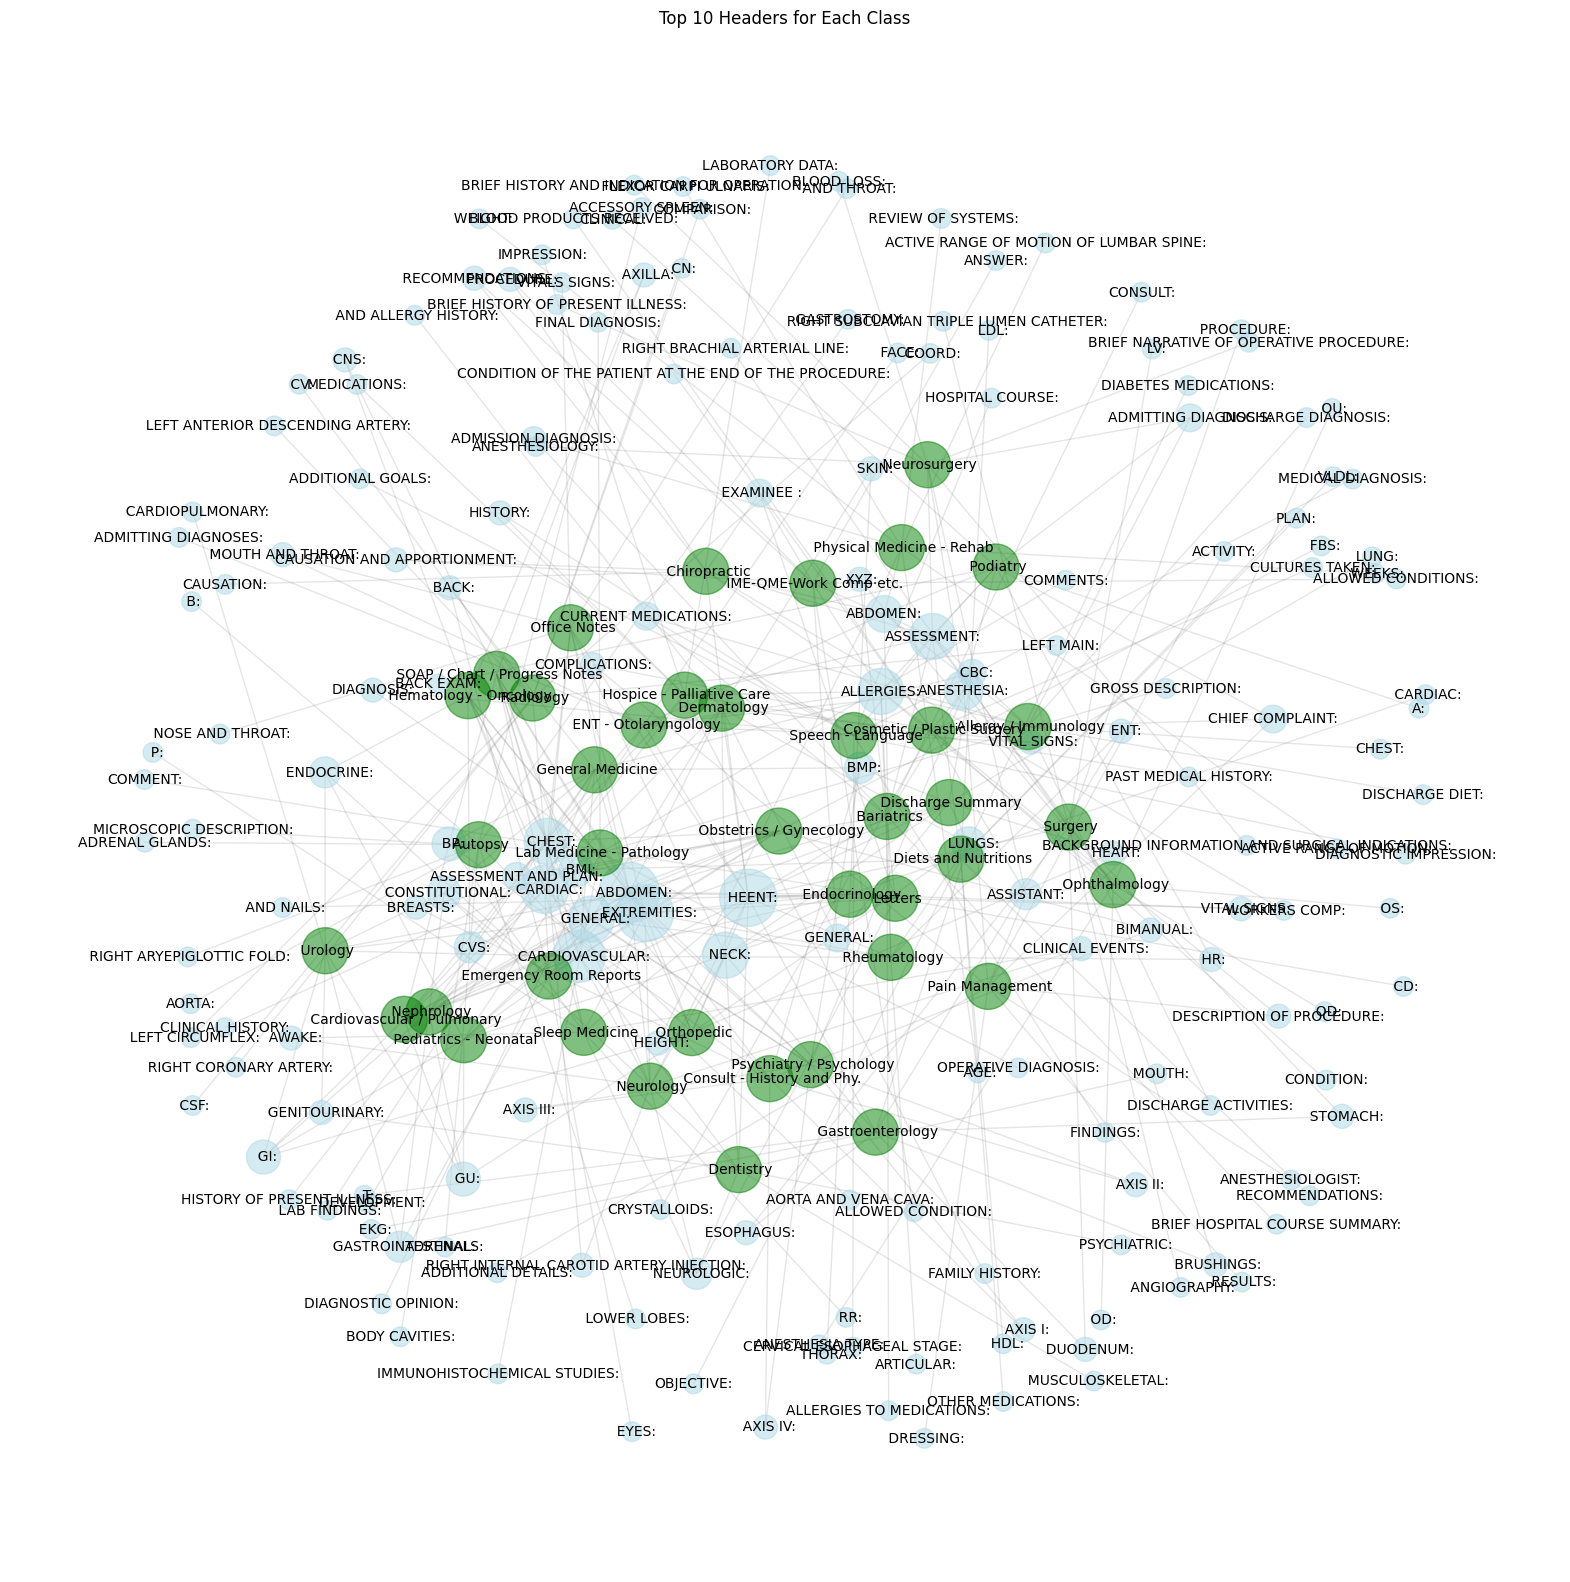

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()
class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1
top_headers_per_class = {med_class: counts.most_common(10) for med_class, counts in class_header_counts.items()}
for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())

colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [100 + 100 * degrees[node] for node in G.nodes()]  
plt.figure(figsize=(20, 20))
#pos = nx.kamada_kawai_layout(G, weight='weight')  
pos = nx.spring_layout(G, k=0.5, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Top 10 Headers for Each Class')
plt.axis('off')
plt.show()


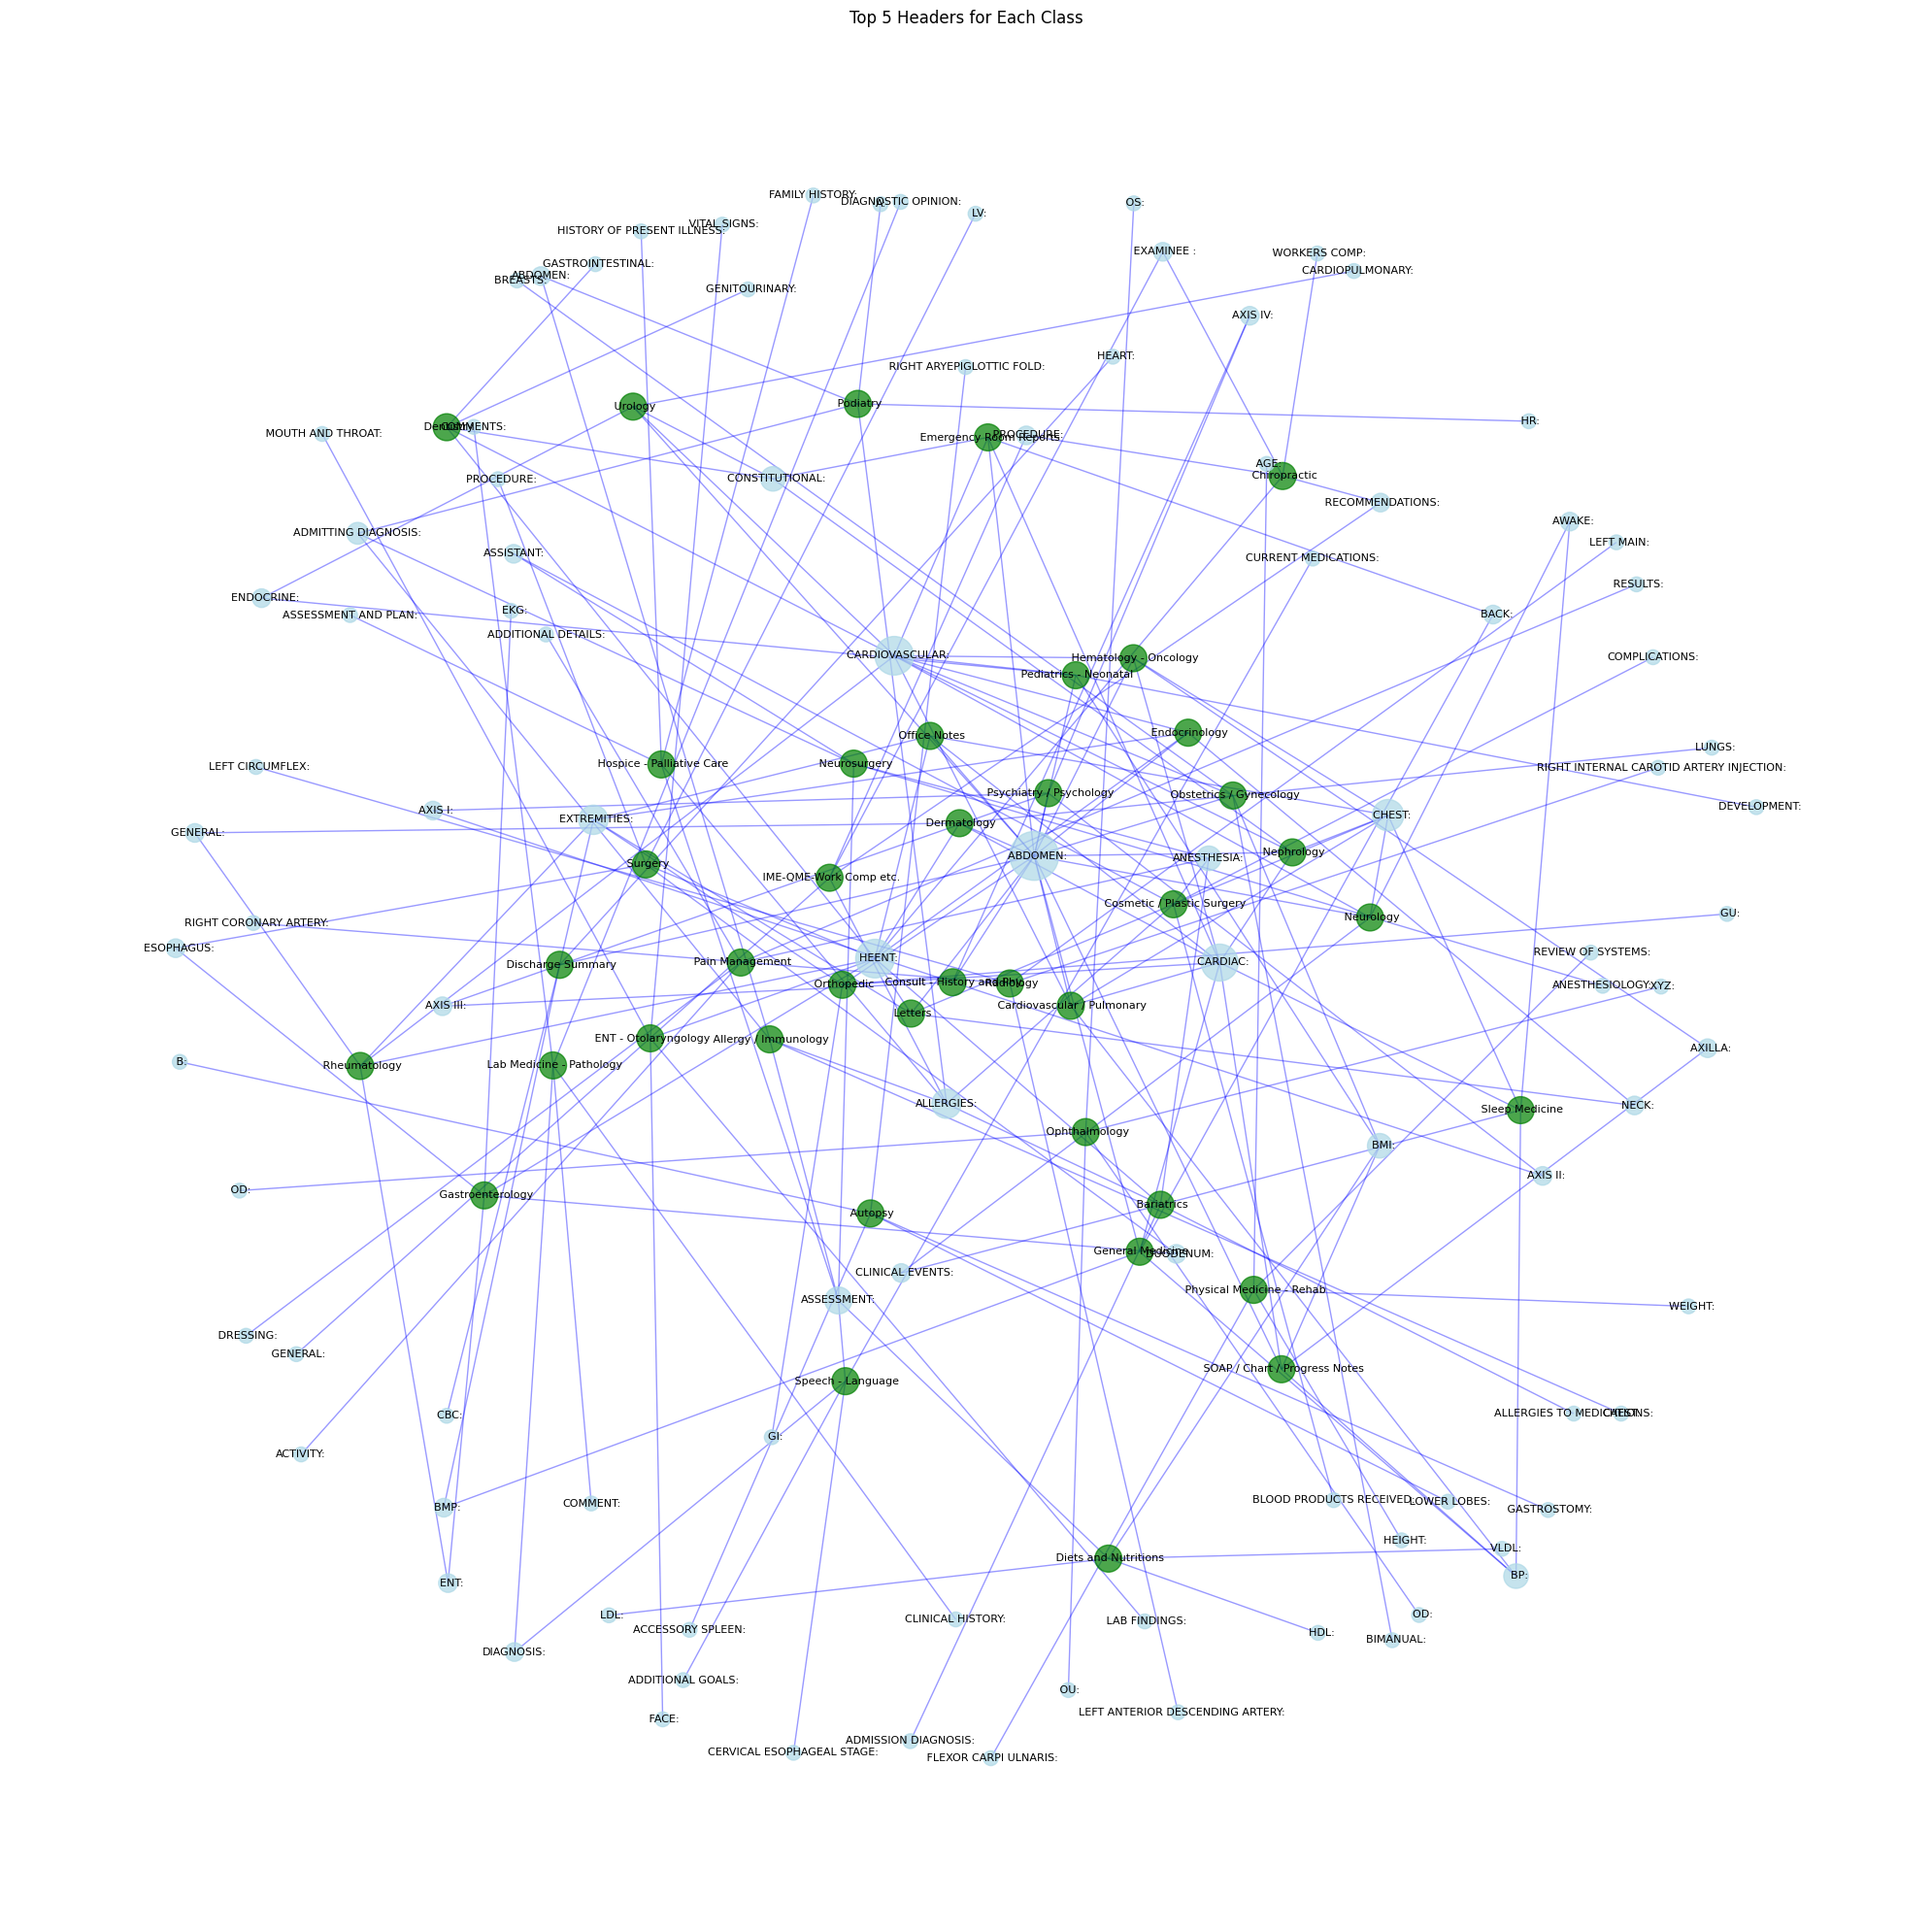

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()
class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1

top_headers_per_class = {med_class: counts.most_common(5) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())
colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [50 + 70 * degrees[node] for node in G.nodes()]  

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.7, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='blue')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.7)  
nx.draw_networkx_labels(G, pos, font_size=8) 

plt.title('Top 5 Headers for Each Class')
plt.axis('off')
plt.tight_layout()
plt.show()


In [30]:
import networkx as nx
G = nx.Graph()
from pyvis.network import Network

class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1


top_headers_per_class = {med_class: counts.most_common(5) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count, color='grey')


nt = Network(notebook=True, width='100%', height='800px', directed=False, bgcolor='#FFFFFF', font_color='black')
nt.barnes_hut()


nt.from_nx(G)

nt.toggle_physics(True)
nt.options = {
    "nodes": {
        "font": {
            "size": 9
        }
    },
    "interaction": {
        "hover": True
    },
    "edges": {
        "color": {
            "highlight": "red",
            "hover": "red"
        }
    },
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.5,
            "springLength": 200,
            "springConstant": 0.05,
            "damping": 0.09,
            "avoidOverlap": 0.1
        },
        "minVelocity": 0.75
    }
}

nt.show('network.html')



network.html


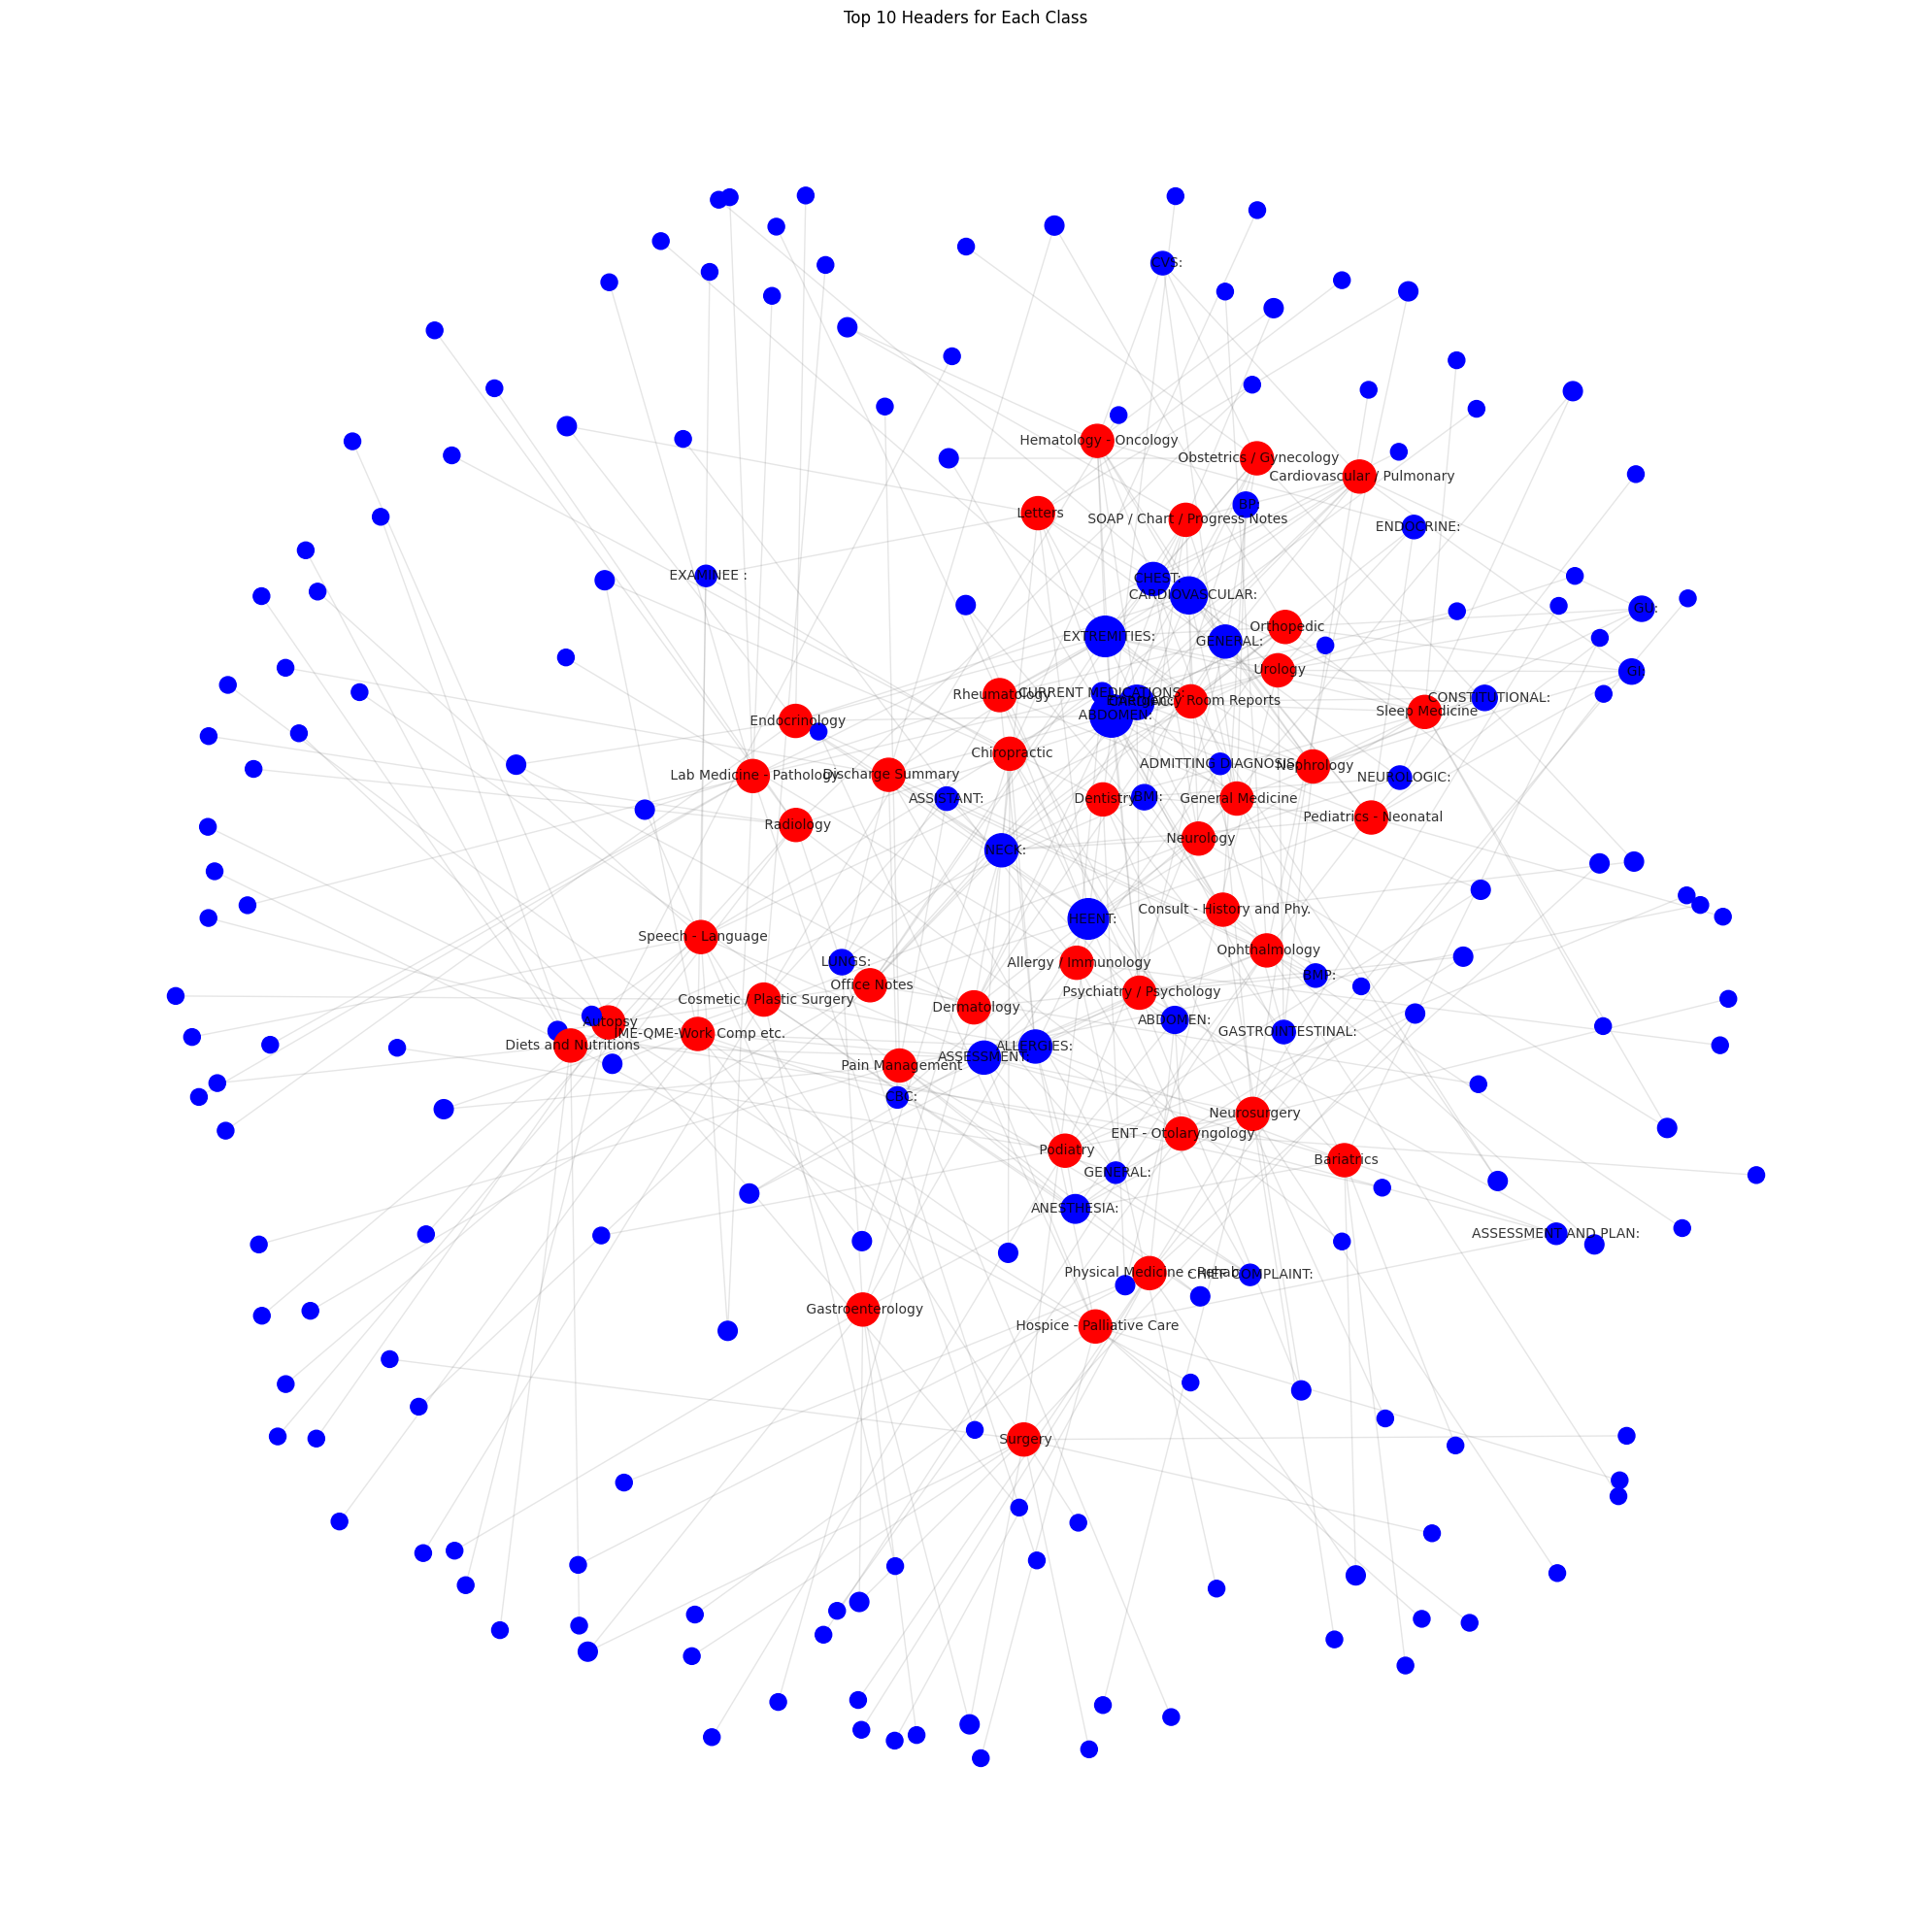

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()

class_header_counts = defaultdict(Counter)

for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1

top_headers_per_class = {med_class: counts.most_common(10) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='blue')
        G.add_node(med_class, type='class', color='red')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())

colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [100 + 50 * degrees[node] for node in G.nodes()]  
edge_alphas = [(i[2]['weight'] / max(dict(G.degree()).values())) for i in G.edges(data=True)]

labels = {node: node if degrees[node] > 2 else '' for node in G.nodes()}

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.5, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, alpha=0.8)

plt.title('Top 10 Headers for Each Class')
plt.axis('off')
plt.tight_layout()
plt.show()


## A structured and flexible (configurable) processing pipeline

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

class TextProcessingPipeline:

    language_mapping = {
        'en': 'english',
        'pt': 'portuguese',
        'de': 'german',
        'nl': 'dutch'
    }
    
    def __init__(self, language='en', tokenizer_type='word', stemmer_type='snowball', use_stemming=True, use_lemmatization=False, use_special_header=False):
        self.language = self.language_mapping.get(language, language)
        self.tokenizer = self._choose_tokenizer(tokenizer_type)
        self.stemmer = self._choose_stemmer(stemmer_type)
        self.lemmatizer = WordNetLemmatizer() if use_lemmatization and self.language == 'english' else None
        self.use_stemming = use_stemming
        self.use_special_header = use_special_header
        self.stop_words = set(stopwords.words(self.language))
    
    def _handle_special_headers(self, text):
        headers = unique_headers_list
        segments = {}
        for i, header in enumerate(headers):
            if header.lower() in text:
                start_idx = text.find(header.lower())
                end_idx = text.find(headers[i + 1].lower()) if i + 1 < len(headers) and headers[i + 1].lower() in text else None
                segments[header[:-1]] = text[start_idx + len(header):end_idx].strip() if end_idx else text[start_idx + len(header):].strip()
                
        return segments

    def _choose_tokenizer(self, tokenizer_type):
        if tokenizer_type == 'word':
            return word_tokenize
        elif tokenizer_type == 'sentence':
            return sent_tokenize
        elif tokenizer_type == 'regex':
            tokenizer = RegexpTokenizer(r'\w+')
            return tokenizer.tokenize
        else:
            raise ValueError('Invalid tokenizer type.')

    def _choose_stemmer(self, stemmer_type):
        if self.language not in ['english', 'portuguese', 'german', 'dutch']:
            raise ValueError('Stemming support is limited to English, Portuguese, German, and Dutch.')
        if stemmer_type == 'snowball':
            return SnowballStemmer(language=self.language)
        else:
            raise ValueError('Invalid stemmer type.')

    def process(self, text):
        #  headers
        if self.use_special_header:
            segments = self._handle_special_headers(text.lower())
            for header, content in segments.items():
                tokens = self.tokenizer(content)
                tokens = [token for token in tokens if token not in [',', '.', ':']]

                # normlaization
                if self.lemmatizer:
                    tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
                elif self.use_stemming:
                    tokens = [self.stemmer.stem(token.lower()) for token in tokens]
                else:
                    tokens = [token.lower() for token in tokens]

                tokens = [token for token in tokens if token not in self.stop_words]
                
                segments[header] = tokens
            return segments

        # tokenization
        tokens = self.tokenizer(text)

        # remove unwanted characters
        tokens = [token for token in tokens if token not in [',', '.', ':','(',')','#','?','2','1','dr.']]
        
        
        # normalization: lowercase, stemming/lemmatization
        if self.lemmatizer:
            tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
        elif self.use_stemming:
            tokens = [self.stemmer.stem(token.lower()) for token in tokens]
        else:
            tokens = [token.lower() for token in tokens]
        
        # remove stop words
        tokens = [token for token in tokens if token not in self.stop_words]
        
        return tokens


#### Text processing pipeline for English texts 
- NLTK Word tokenizer and Snowball stemmer and special headers handling (no lemmaitzation)
- Be aware letting it run takes several minutes = up to 7min

In [ ]:
# Text processing pipeline for English texts using word tokenizer and Snowball stemmer and special headers handling

english_texts = df[df['language'] == 'en']
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)

# original text vs processed text
print(english_texts[['text', 'processed_text']].head())

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Reby/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\Reby\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


- NLTK Sentence tokenizer and Snowball stemmer and no special headers handling and no lemmatization
- takes up to 6s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\4281618194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK Regex tokenizer and Snowball stemmer and no special headers handling and no lemmatization
- takes up to 22s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          processed_text
0                                                         [preoper, diagnosi, iron, defici, anemia, postop, diagnosi, diverticulosi, procedur, colonoscopi, medic, mac, procedur, olympus, pedi

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\3935858733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK word tokenizer and no stemmer and no special headers handling - but lemmatization
- takes up to 22s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word',use_stemming=False, use_lemmatization=True, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        processed_text
0  [preoperative, diagnosis, iron, deficiency, anemia., postoperative, diagnosis,

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1608101184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


## Calculate TFDs for different variants of the processing pipeline

Using pipeline variant #1


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(variant.process)
C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


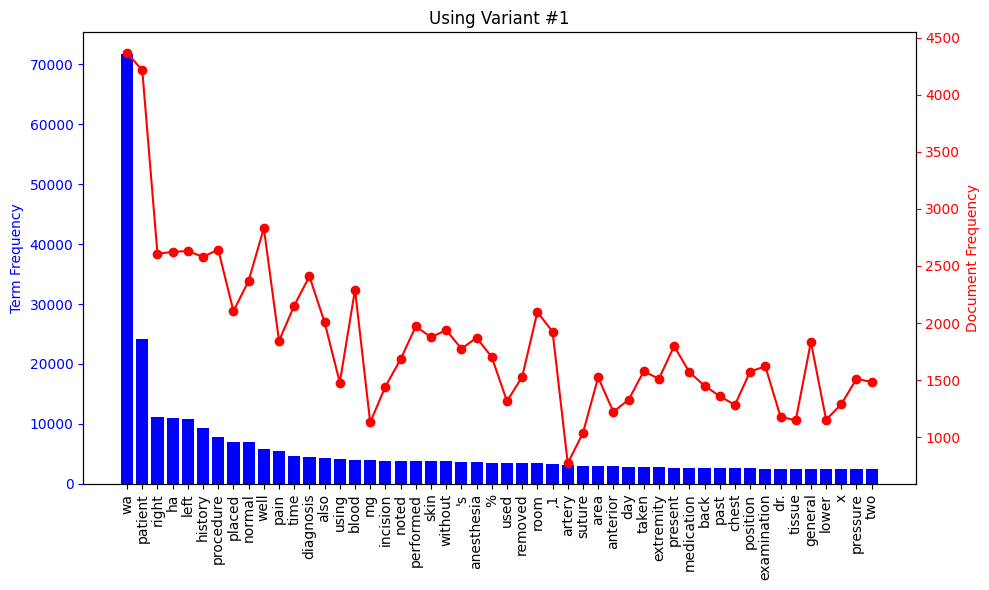


--------------------------------------------------

Using pipeline variant #2


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


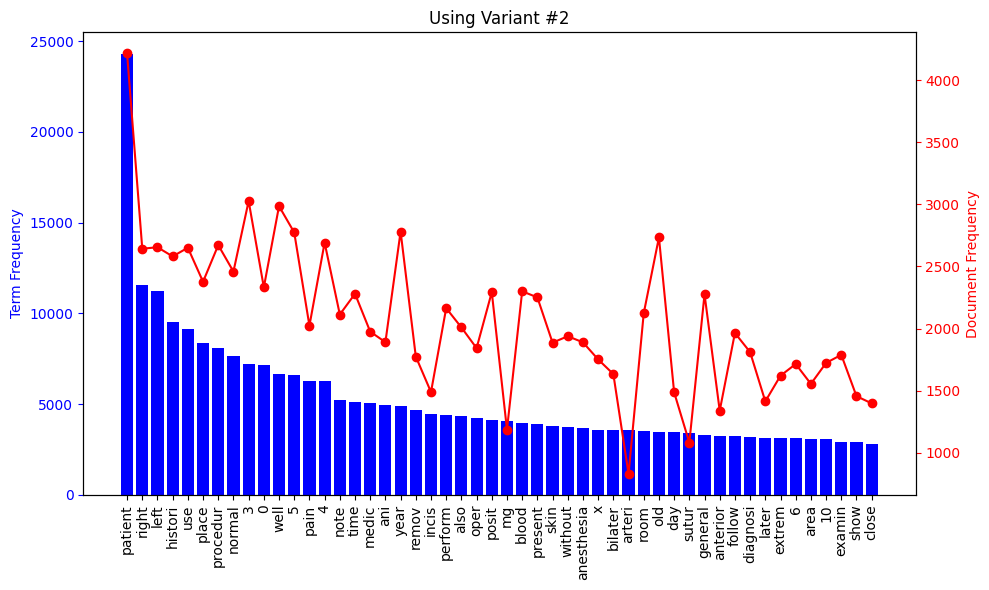


--------------------------------------------------

Using pipeline variant #3


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


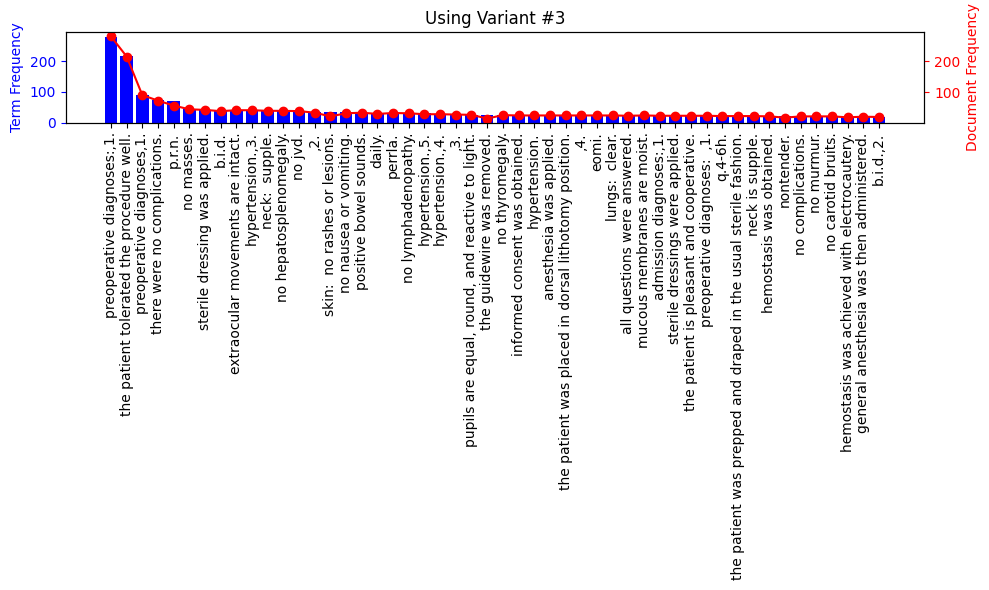


--------------------------------------------------

Using pipeline variant #4


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


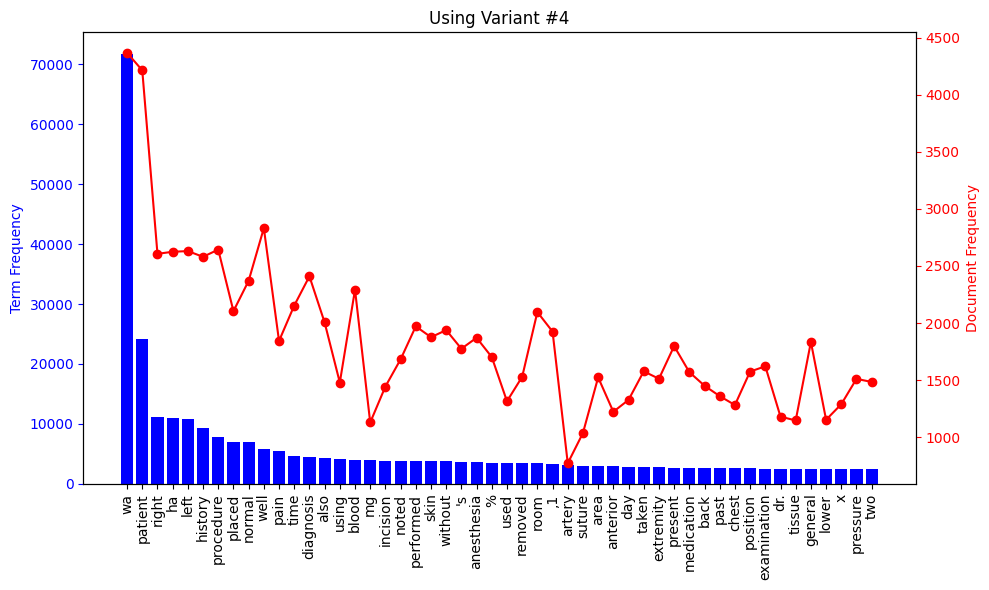


--------------------------------------------------



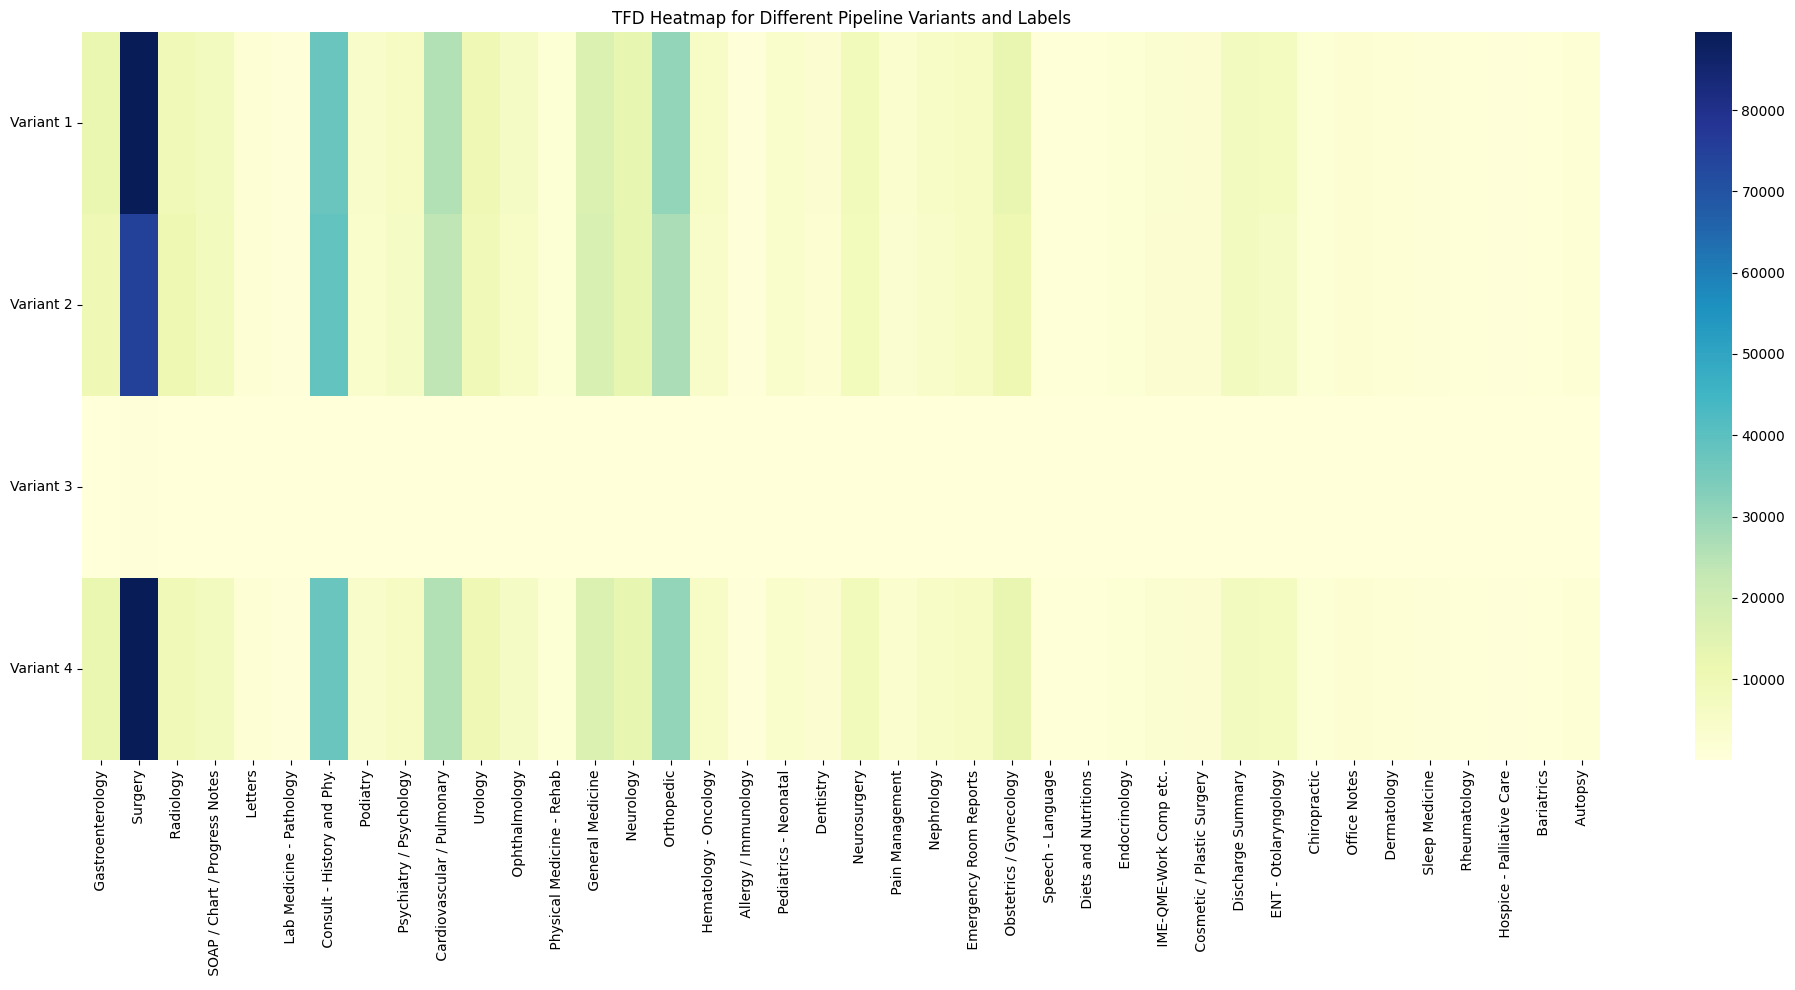

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
import seaborn as sns
import pandas as pd


def compute_document_frequency(texts):
    df = FreqDist()
    for text in texts:
        for term in set(text):  
            df[term] += 1
    return df

def plot_tf_and_df(tf, df, variant_index):
    N = 50
    terms, term_freqs = zip(*tf.most_common(N))
    doc_freqs = [df[term] for term in terms]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # bar plot for Term Frequency
    ax1.bar(terms, term_freqs, color='blue', label='Term Frequency')
    ax1.set_ylabel("Term Frequency", color='blue')
    ax1.tick_params(axis='y', colors='blue')
    
    #  line plot for Document Frequency
    ax2 = ax1.twinx()
    ax2.plot(terms, doc_freqs, color='red', marker='o', label='Document Frequency')
    ax2.set_ylabel("Document Frequency", color='red')
    ax2.tick_params(axis='y', colors='red')
    
    plt.title(f"Using Variant #{variant_index}")
    ax1.set_xticklabels(terms, rotation=90)
    plt.xticks(rotation=70)
    plt.tight_layout()  
    
    plt.show()

def plot_tfd(tf, variant_index):
    N = 50
    terms, freqs = zip(*tf.most_common(N))
    
    plt.figure(figsize=(10, 6))
    plt.bar(terms, freqs, color='blue')
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Term Frequency Distribution for Variant #{variant_index}")
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.tight_layout()  
    plt.show()

# different variants
pipeline_variants = [
    # TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True), # variant 1 - takes too long
    TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=True, use_special_header=False), # variant 1
    TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False),  # variant 2
    TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False), # variant 3
    TextProcessingPipeline(language='en', tokenizer_type='word', use_stemming=False, use_lemmatization=True, use_special_header=False) # variant 4
]

# zeros-filled dataframe to store TFD values for each label and variant
heatmap_data = pd.DataFrame(0, index=[f"Variant {i+1}" for i in range(len(pipeline_variants))], 
                            columns=english_texts['label'].unique())

for index, variant in enumerate(pipeline_variants, 1):
    print(f"Using pipeline variant #{index}")
    
    english_texts['processed_text'] = english_texts['text'].apply(variant.process)
    all_terms = [term for sublist in english_texts['processed_text'] for term in sublist]

    tf_per_class = {}  # Store TFD for each class
    
    tf = FreqDist(all_terms)
    df = compute_document_frequency(english_texts['processed_text'])

    plot_tf_and_df(tf, df, variant_index=index)

    unique_classes = english_texts['label'].unique()
    for class_label in unique_classes:
        class_texts = english_texts[english_texts['label'] == class_label]['processed_text']
        all_terms = [term for sublist in class_texts for term in sublist]
        tf = FreqDist(all_terms)

        N = 50
        _, term_freqs = zip(*tf.most_common(N))
        heatmap_data.at[f"Variant {index}", class_label] = sum(term_freqs)
    
    print("\n" + "-"*50 + "\n")

#  heatmap TFD
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d", annot_kws={"size": 10})
plt.title("TFD Heatmap for Different Pipeline Variants and Labels")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()



### Term Frequency Distribution Analysis using different text processing pipelines 

The heatmap provides insights into the Term Frequency Distributions (TFD) across four distinct pipeline variants when processing various labels

- Variant 1: uses word tokenization, snowball stemming, and lemmatization. This variant seems to capture a comprehensive set of terms, as indicated by its high TFD across most classes.
- Variant 2: uses regex tokenization combined with snowball stemming, but without lemmatization. the absence of lemmatization might result in different inflections of a word being treated separately, potentially dispersing the term frequencies.
- Variant 3: uses sentence tokenization with the inclusion of snowball stemming, but omits lemmatization. Sentence tokenization may yield fewer tokens, focusing more on the holistic understanding of content rather than individual terms.
- Variant 4: Uses word tokenization and lemmatization, but specifically avoids stemming.

Observations
- Surgery, as a label, has a notably high term frequency across all pipeline variants. This suggests that texts under this label might be more verbose or repetitive.
Variant 1 consistently yields higher term frequencies across most labels when compared to other variants, indicating its potential efficacy in capturing relevant terms.

- Other labels, like Dermatology and ENT, display low term frequencies across all variants, which could imply shorter texts or less repetitive terminology in these fields.

For tasks that require extensive term extraction and understanding of textual nuances, Variant 1 seems to be the most effective way whereas 3 is definitevly not ideal. 
Different pipeline - techniques therefore change the outcome! 


### You ca see other examples of changes of text pipline processing (and their term distribution)  below again: 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


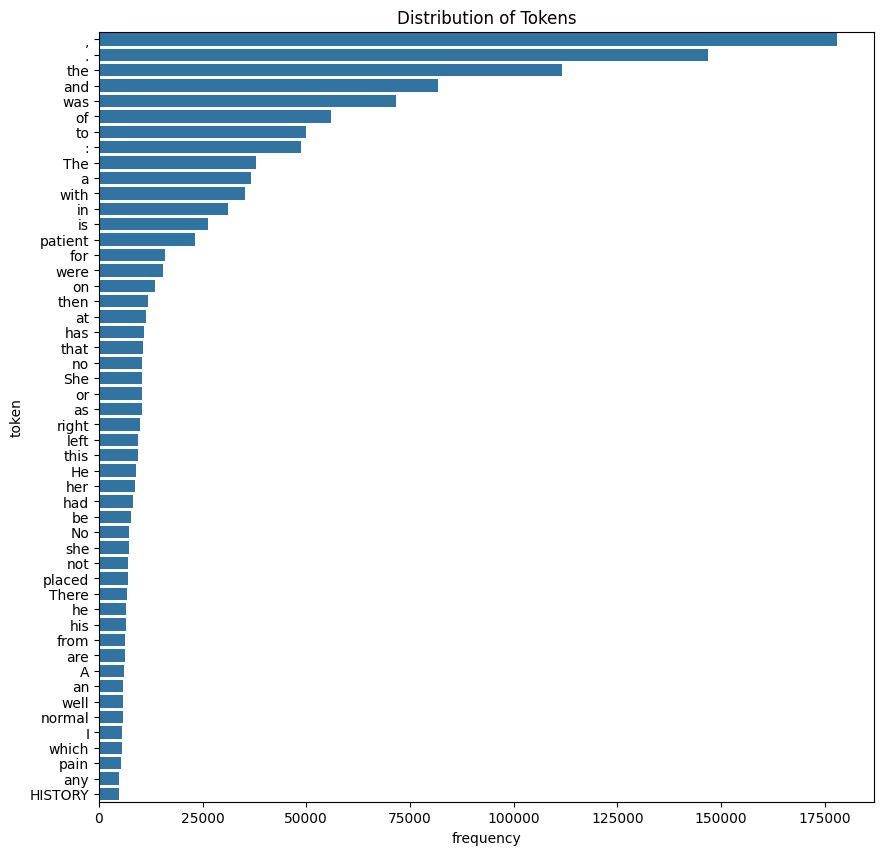

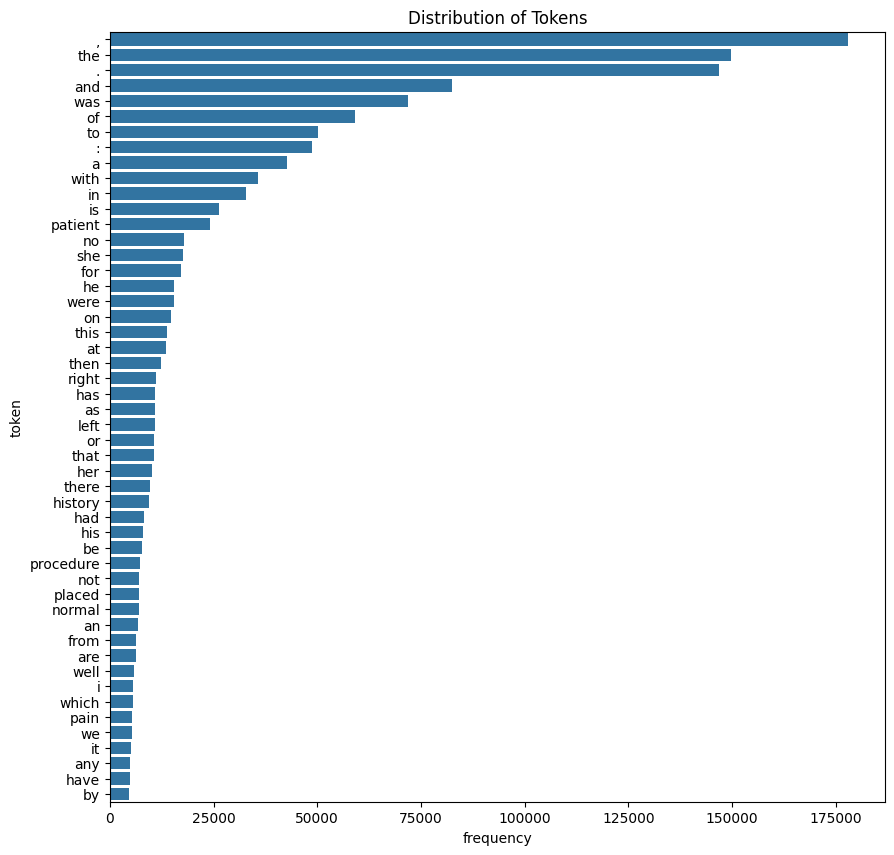

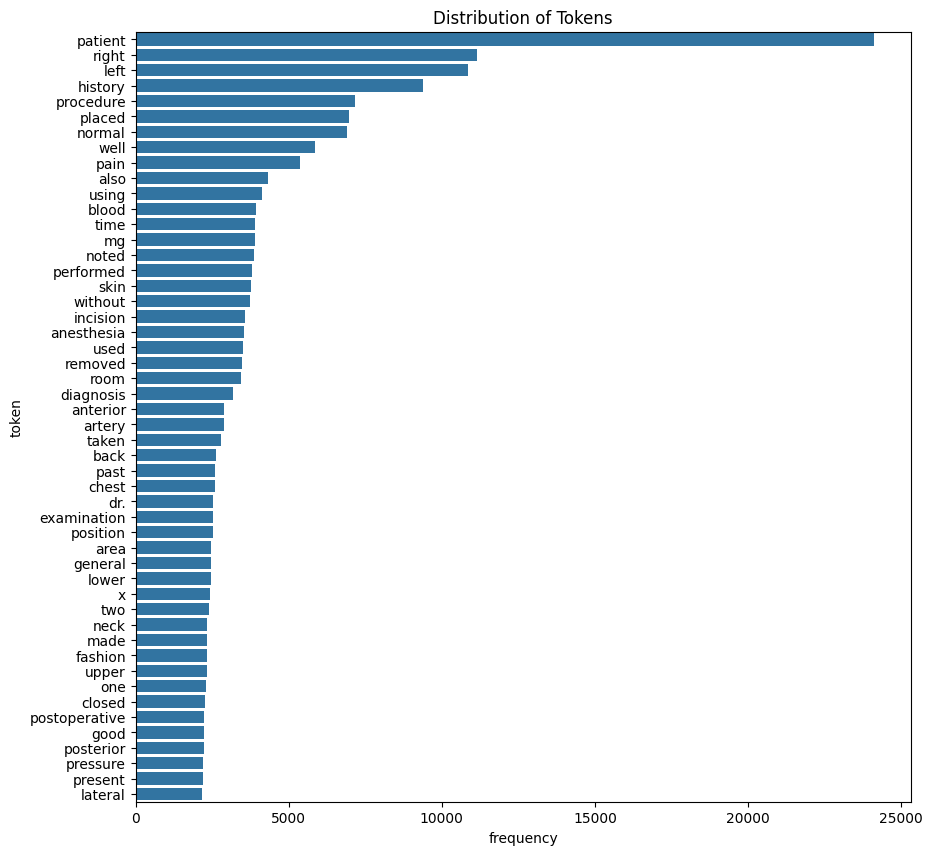

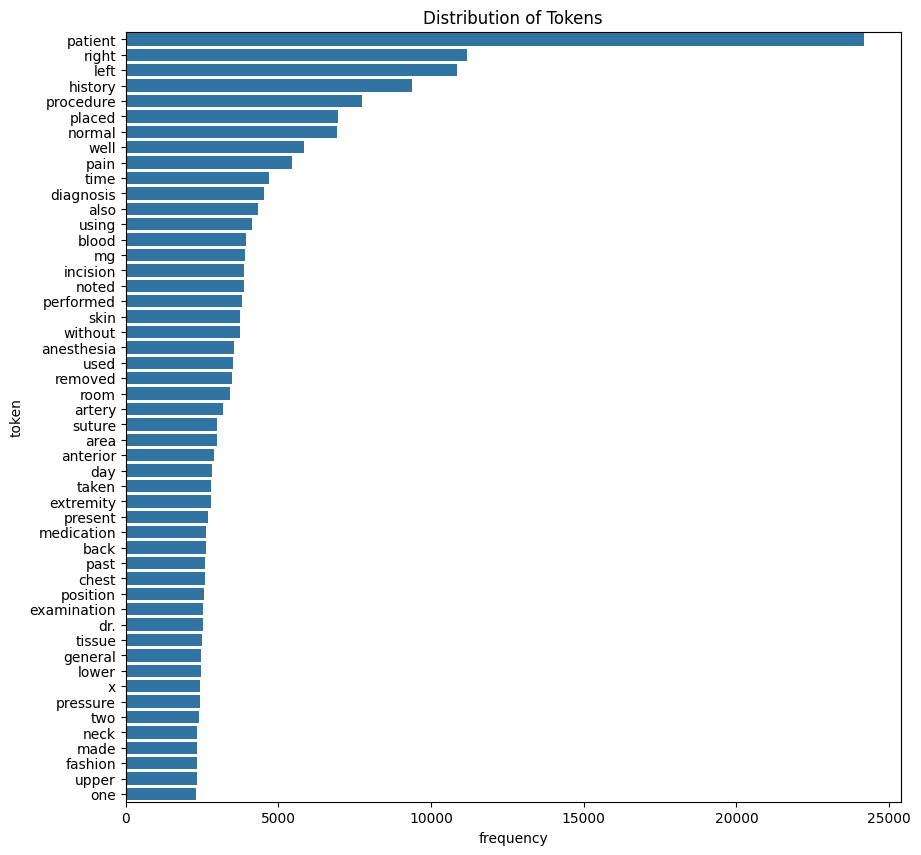

In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])


label_frequencies = df.label.value_counts()



tokens = df.text.apply(func=word_tokenize).explode()


def plot_token_frequencies(tokens):
	token_frequencies = tokens.value_counts().head(50)
	fig, ax = plt.subplots(1, 1, figsize = (10, 10))
	sns.barplot(
		x=token_frequencies.values,
		y=token_frequencies.index,
		ax=ax
	)
	ax.set_title('Distribution of Tokens')
	ax.set_xlabel('frequency')
	ax.set_ylabel('token')
	plt.show()


plot_token_frequencies(tokens)


filtered_tokens = tokens.str.lower()
plot_token_frequencies(filtered_tokens)


filtered_tokens = filtered_tokens[~filtered_tokens.isin(stopwords.words('english'))]
filtered_tokens = filtered_tokens[filtered_tokens.str.match('[a-z]')]
plot_token_frequencies(filtered_tokens)


lemmatizer = WordNetLemmatizer()
filtered_tokens = filtered_tokens.apply(lambda x: lemmatizer.lemmatize(x))
plot_token_frequencies(filtered_tokens)


